Index(['ht_count', 'ht_count_roc2', 'ht_count_roc3', 'ht_count_roc5'], dtype='object')
a: [-0.00169866465, 7.95845746e-05, -0.00533970874]
lr.coef_: [ 0.05296232  0.13517086 -0.08060425]
rmse_lr: 0.5848142280505716
rmse_2ma: 0.6094448426604429
rmse_3ma: 1.0065864651408811
rmse_5ma: 1.1482367085315182


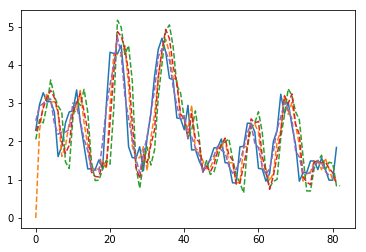

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 6
from sklearn import linear_model
import json
import numpy as np
from os import listdir
from os.path import isfile, join
from sklearn.metrics import mean_squared_error
from math import sqrt

a = [-1.69866465e-03,  7.95845746e-05, -5.33970874e-03]

def df_roc(df, name, r=[]):
    roc = lambda x: ( (x[-1] - x[0])/x[0] if x[0] != 0 else 0 )
    for i in r:
        nname = name + '_roc' + str(i)
        df[nname] = df[name].rolling(i).apply(roc)
    return df
def sma_predict(l):
    nl = []
    for i in range(0,len(l)-1):
        x = l[i]
        if np.isnan(x) or np.isinf(x):
            nl.append(x)
        else:
            nl.append(2*l[i+1]-x)
    return nl
def main2(df,tag_name):
    x = []
    y = []
    ht_count = []
    ht_count_2ma = []
    ht_count_3ma = []
    ht_count_5ma = []
    #df1 = df[4:]
    x_list = []
    y_list = []
    for l in df[4:].values:
        x_list.append(l.tolist()[1:])
        y_list.append(l[1])
    x += x_list[:-1]
    y += y_list[1:]
    
    ht_count = df['ht_count'].tolist()[4:]
    
    ht_count_2ma = sma_predict(df['ht_count'].shift().rolling(2).mean().tolist())[2:]
    ht_count_3ma = sma_predict(df['ht_count'].shift().rolling(3).mean().tolist())[3:]
    ht_count_5ma = sma_predict(df['ht_count'].shift().rolling(5).mean().tolist())[5:]
    
    lr = linear_model.LinearRegression()
    lr.fit(x,y)
    print(df.columns)
    print('a: {}'.format(a))
    print('lr.coef_: {}'.format(lr.coef_))
    #output += lr.coef_ + '\n'
    prediction = [0]
    prediction2 = [0]
    
    for i, c in enumerate(ht_count[:-1]):
        #prediction = old ht count*(1+dot product(lr.coef,[x1,x2,x3...]))
        prediction.append(c*(1+sum([x*y for x,y in zip(x[i],a)])))
        prediction2.append(c*(1+sum([x*y for x,y in zip(x[i],lr.coef_)])))
    #print(len(prediction))
    #print(len(ht_count))
    rmse_lr = sqrt(mean_squared_error(ht_count[1:], prediction[1:]))
    rmse_lr2 = sqrt(mean_squared_error(ht_count[1:], prediction2[1:]))
    rmse_2ma = sqrt(mean_squared_error(ht_count, ht_count_2ma[1:]))
    rmse_3ma = sqrt(mean_squared_error(ht_count[1:], ht_count_3ma[:-1]))
    rmse_5ma = sqrt(mean_squared_error(ht_count[3:], ht_count_5ma[:-1]))
    
    #error1 = [x for x in error1 if not np.isnan(x) and not np.isinf(x)]
    print('rmse_lr: {}'.format(rmse_lr ))
    #print('rmse_lr2: {}'.format(rmse_lr2 ))
    print('rmse_2ma: {}'.format(rmse_2ma ))
    print('rmse_3ma: {}'.format(rmse_3ma ))
    print('rmse_5ma: {}'.format(rmse_5ma ))
    d = {'tag_name':tag_name,
            'rmse_lr':rmse_lr,
            'rmse_2ma':rmse_2ma,
            'rmse_3ma':rmse_3ma,
            'rmse_5ma':rmse_5ma
        }
    '''with open('output_lr_sma' ,'a') as f:
        f.write(json.dumps(d)+ '\n')
    return'''
    plt.figure(0)
    plt.plot(ht_count)
    plt.plot(prediction,linestyle='dashed')
    plt.plot(ht_count_2ma,linestyle='dashed')
    plt.plot(ht_count_3ma,linestyle='dashed')
    plt.plot(ht_count_5ma,linestyle='dashed')

def main():    
    #rng = pd.date_range('26/09/2017', periods=51*24*60/2, freq='2min')
    df = pd.DataFrame()
    tag_name = ''
    with open('preprocessed/trend_mutiple_3') as f:
        ts_list = []
        for line in f:
            d = json.loads(line)
            tag_name = d[0]
            ht_counts = d[1]
            #  'EXO_20170929-060000'
            if tag_name != 'EXO_20170929-060000':
                continue
            '''parsing_list = ['EXO_20170928-090000',
                                   'EXO_20170928-120000',
                               'EXO_20170928-150000',
                               'EXO_20170928-180000',
                               'EXO_20170928-210000',
                               'EXO_20170929-000000',
                               'EXO_20170929-030000'] 
            if tag_name not in parsing_list:
                continue
            
            ts_list += ht_counts
            if tag_name == 'EXO_20170929-030000':
                ht_counts = ts_list
            else:
                continue'''
            kw = { 'ht_count':pd.Series(ht_counts)}
            df = df.assign(**kw)
            df = df_roc(df,'ht_count',[2,3,5])
            #df = df_roc(df,tag_name,3)
            #df = df_roc(df,tag_name,5)
            main2(df,tag_name)
            
    
        
    

if __name__ == '__main__':
    main()

[ 0.3268582   0.25647094 -0.30095538  0.23388428  0.38238378 -0.40826457
  0.06314316 -0.12754709]
48
48
mean abs error: 0.17829787234042552 std: 0.18822032301394306


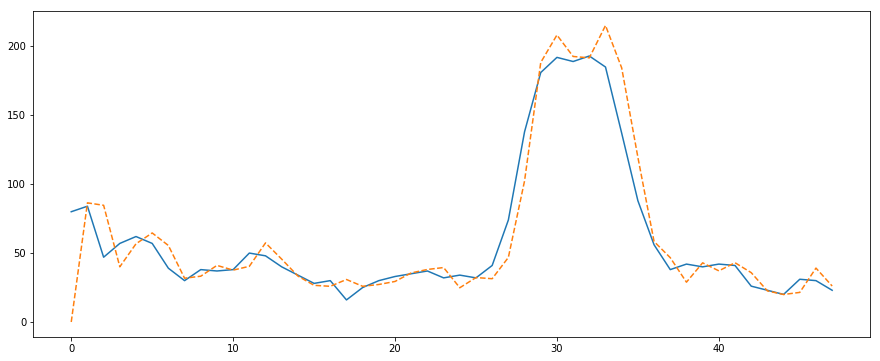

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from sklearn import linear_model
import json
import numpy as np
from os import listdir
from os.path import isfile, join
mypath = 'meta_trends_output_roc_3days/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

x = []
y = []
ht_count = []
#a = [ 0.46424543, -0.90923146, -0.15989832,  1.16314238, -0.00367094, -0.77737231, 0.00263605, -0.05105621]
a = [-0.00550714,  0.05236065,  0.00091188, -0.00213681, -0.00154417,  0.00572413, 0.05307424, -0.00489398]
name = 'gaming'
data_list = []
for fname in onlyfiles:
    with open('meta_trends_output_roc_3days/roc_output_' + name) as f:
        for line in f:
            d = json.loads(line)
            if 'roc_ht_count' not in d:
                continue
            data_list.append(d)
        break
for i, d in enumerate(data_list):    
    ht_count.append(d['ht_count'])
    if i < ( len(data_list) - 1):
        x.append([d['roc_ht_count'], 
                  d['roc_user_count'], 
                  d['roc_followers_count'], 
                  d['roc_statuses_count'], 
                  d['roc_ratio_followers_user'],
                  d['roc_ratio_statuses_user'],
                  d['roc_in_reply_to_status_count'],
                  d['roc_retweeted_status_count']
                  ])
    if i < 1:
        continue
    y.append(d['roc_ht_count'])

lr = linear_model.LinearRegression()
lr.fit(x,y)
print(lr.coef_)
prediction = [0]

for i, c in enumerate(ht_count[:-1]):
    #prediction = old ht count*(1+dot product(lr.coef,[x1,x2,x3...]))
    prediction.append(c*(1+sum([x*y for x,y in zip(x[i],lr.coef_)])))
    #prediction.append(c*(1+sum([x*y for x,y in zip(x[i],a)])))
print(len(prediction))
print(len(ht_count))
error = [round(abs(x-y)/y,2) if y != 0 else 0 for x,y in zip(prediction[1:],ht_count[1:])]
error = [x for x in error if not np.isnan(x) and not np.isinf(x)]
print('mean abs error: {} std: {}'.format(np.mean(error),np.std(error) ))
#print(error)

plt.figure(0)
plt.plot(ht_count)
plt.plot(prediction,linestyle='dashed')



In [64]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join


def main():    
    mypath = 'tweets_filtered_top1000/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    num_days = 51
    rng = pd.date_range('26/09/2017', periods=num_days, freq='D')
    hts_by_date = [{} for x in range(0,num_days)]
    hts = []
    hts_needed = {}
    with open('count_all_hts') as f:
        count = 0
        for l in f:
            count += 1
            if count > 1000:
                break
            d = json.loads(l)
            hts_needed[d[0]] = d[1]
    #hts_needed = {'giveaway':''}
    for fpath in onlyfiles:
        print(fpath)
        with open(mypath+fpath) as f:
            for line in f:
                tweet = json.loads(line)
                tweet_time = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
                ts = tweet_time
                i = 0
                while rng[i] < ts:
                    i += 1
                    if i >= num_days:
                        break
                i -= 1
                for ht in tweet['hashtags']:
                    ht_name = ht['text'].lower()
                    if ht_name not in hts_needed:
                        continue
                    if ht_name not in hts:
                        hts.append(ht_name)
                    if ht_name not in hts_by_date[i]:
                        hts_by_date[i][ht_name] = {}
                        hts_by_date[i][ht_name]['users'] = {}
                        hts_by_date[i][ht_name]['count'] = 0
                        hts_by_date[i][ht_name]['in_reply_to_status_count'] = 0
                        hts_by_date[i][ht_name]['retweeted_status_count'] = 0
                    
                    hts_by_date[i][ht_name]['count'] += 1
                    hts_by_date[i][ht_name]['users'][tweet['user_id_str']] = [tweet['user_followers_count'] ,
                                                                              tweet['user_statuses_count']
                                                                             ]
                    hts_by_date[i][ht_name]['in_reply_to_status_count'] += 0 if tweet['in_reply_to_status_id_str'] == 'None' else 1
                    hts_by_date[i][ht_name]['retweeted_status_count'] += 0 if tweet['retweeted_status_id_str'] == '' else 1
    counter = 1
    for ht_name in hts:
        print('processing {}'.format(counter))
        counter += 1
        df = pd.DataFrame(index=rng)
        kw = {'ht_count':pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng),
                 'user_count':pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng),
                 'in_reply_to_status_count':pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng),
                 'followers_count':pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng),
                 'statuses_count':pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng),
                 'retweeted_status_count':pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng),
             }
        df = df.assign(**kw)
        for i in range(0,num_days):
            k = ht_name
            if k not in hts_by_date[i]:
                continue
            v = hts_by_date[i][k]
            #df.at[rng[i],ht_name] += 1
            df.at[rng[i],'ht_count'] = v['count']
            df.at[rng[i],'in_reply_to_status_count'] = v['in_reply_to_status_count']
            df.at[rng[i],'retweeted_status_count'] = v['retweeted_status_count']
            df.at[rng[i],'user_count'] = len(v['users'])
            df.at[rng[i],'followers_count'] = sum(x[0] for k, x in v['users'].items() )
            df.at[rng[i],'statuses_count'] = sum(x[1] for k, x in v['users'].items() )
        if df['ht_count'].sum() != hts_needed[ht_name]:
            print('error: {}: {}, {}'.format(ht_name,df['ht_count'].sum(),hts_needed[ht_name]))
        df.to_csv('top1000_hts_df/'+ht_name+'.csv')
                    

if __name__ == '__main__':
    main()

stream_tweets-20170926-182453.txt
stream_tweets-20170926-220410.txt
stream_tweets-20170927-010032.txt
stream_tweets-20170927-035451.txt
stream_tweets-20170927-064955.txt
stream_tweets-20170927-093042.txt
stream_tweets-20170927-122426.txt
stream_tweets-20170927-162546.txt
stream_tweets-20170927-200537.txt
stream_tweets-20170927-224442.txt
stream_tweets-20170928-011444.txt
stream_tweets-20170928-035012.txt
stream_tweets-20170928-063526.txt
stream_tweets-20170928-092151.txt
stream_tweets-20170928-120047.txt
stream_tweets-20170928-145527.txt
stream_tweets-20170928-181808.txt
stream_tweets-20170928-204016.txt
stream_tweets-20170928-231333.txt
stream_tweets-20170929-014756.txt
stream_tweets-20170929-043303.txt
stream_tweets-20170929-070622.txt
stream_tweets-20170929-092609.txt
stream_tweets-20170929-111029.txt
stream_tweets-20170929-130852.txt
stream_tweets-20170929-151044.txt
stream_tweets-20170929-174612.txt
stream_tweets-20170929-203402.txt
stream_tweets-20170929-224219.txt
stream_tweets-

stream_tweets-20171020-121454.txt
stream_tweets-20171020-140643.txt
stream_tweets-20171020-165329.txt
stream_tweets-20171020-195312.txt
stream_tweets-20171020-221200.txt
stream_tweets-20171021-000118.txt
stream_tweets-20171021-021656.txt
stream_tweets-20171021-043701.txt
stream_tweets-20171021-063733.txt
stream_tweets-20171021-085957.txt
stream_tweets-20171021-112433.txt
stream_tweets-20171021-130957.txt
stream_tweets-20171021-145756.txt
stream_tweets-20171021-173243.txt
stream_tweets-20171021-193939.txt
stream_tweets-20171021-214107.txt
stream_tweets-20171021-234637.txt
stream_tweets-20171022-012054.txt
stream_tweets-20171022-031820.txt
stream_tweets-20171022-054136.txt
stream_tweets-20171022-074836.txt
stream_tweets-20171022-100640.txt
stream_tweets-20171022-124029.txt
stream_tweets-20171022-150538.txt
stream_tweets-20171022-174008.txt
stream_tweets-20171022-192250.txt
stream_tweets-20171022-214548.txt
stream_tweets-20171022-233611.txt
stream_tweets-20171023-013012.txt
stream_tweets-

stream_tweets-20171114-134801.txt
stream_tweets-20171114-175857.txt
stream_tweets-20171114-210548.txt
stream_tweets-20171115-000144.txt
stream_tweets-20171115-031808.txt
stream_tweets-20171115-065923.txt
stream_tweets-20171115-104700.txt
stream_tweets-20171115-142803.txt
stream_tweets-20171115-185831.txt
stream_tweets-20171115-222356.txt
stream_tweets-20171116-012802.txt
processing 1
error: crypto: 1382, 1302
processing 2
error: momlife: 16907, 12289
processing 3
error: giveaway: 38207, 37042
processing 4
error: ad: 18527, 18507
processing 5
error: looking: 13163, 13155
processing 6
error: win: 13981, 12820
processing 7
processing 8
error: app: 20086, 11578
processing 9
error: city: 557, 469
processing 10
error: need: 1277, 451
processing 11
error: and: 632, 543
processing 12
error: the: 3447, 1107
processing 13
error: of: 1305, 1152
processing 14
processing 15
error: football: 33149, 32048
processing 16
error: world: 1395, 563
processing 17
processing 18
processing 19
processing 20
er

error: coins: 1183, 1174
processing 211
error: idea: 758, 743
processing 212
error: garden: 914, 862
processing 213
error: decor: 1288, 1166
processing 214
error: design: 3868, 2597
processing 215
error: cozy: 696, 691
processing 216
error: paranormal: 522, 490
processing 217
error: horror: 1022, 985
processing 218
error: findom: 1433, 1381
processing 219
error: paypig: 554, 538
processing 220
error: healthcare: 1001, 830
processing 221
error: android: 917, 724
processing 222
error: writing: 812, 786
processing 223
error: contentmarketing: 3369, 3204
processing 224
error: healthy: 885, 864
processing 225
error: food: 5405, 1695
processing 226
error: comedy: 606, 568
processing 227
error: cat: 1776, 1749
processing 228
processing 229
processing 230
error: bot: 4205, 4197
processing 231
error: career: 487, 428
processing 232
error: fall: 579, 511
processing 233
error: autumn: 552, 485
processing 234
error: decoration: 487, 482
processing 235
error: nfl: 2440, 583
processing 236
error: he

processing 429
error: amwriting: 2459, 2457
processing 430
error: poetry: 675, 662
processing 431
processing 432
error: vacature: 2235, 2233
processing 433
error: dts: 749, 741
processing 434
processing 435
processing 436
processing 437
processing 438
error: cdnpoli: 1244, 1234
processing 439
error: selfie: 2365, 2350
processing 440
processing 441
error: footworship: 701, 699
processing 442
error: joi: 760, 746
processing 443
processing 444
processing 445
error: footfetish: 992, 954
processing 446
error: fetish: 507, 477
processing 447
error: mufc: 587, 535
processing 448
error: porno: 992, 980
processing 449
error: comics: 748, 709
processing 450
error: recipe: 638, 634
processing 451
error: salvation: 3087, 3084
processing 452
error: africa: 692, 559
processing 453
error: ts: 783, 773
processing 454
processing 455
error: boats: 440, 428
processing 456
processing 457
error: book: 669, 582
processing 458
error: charity: 466, 451
processing 459
error: socent: 465, 433
processing 460
err

In [71]:
import pandas as pd
import numpy as np
from datetime import datetime


df = pd.read_csv('top1000_hts_df/giveaway.csv',index_col=0, parse_dates=True)
print(df.ht_count.sum())
    

38207


In [59]:
a = {'abc':[1,2,2], 'qwe':[3,4,4]}
print(a['Abc'])

KeyError: 'Abc'

In [79]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

def main(hour):
    return
    freq = str(hour) + 'H'
    period = 51*(24/hour)
    rng = pd.date_range('26/09/2017', periods=period, freq=freq)
    df = pd.DataFrame(index=rng)
    with open('count_hts_is_trending-last-ts_with_ts_list') as f:
        for line_index, line in enumerate(f):
            ht = json.loads(line)
            ht_name = ht[0]
            ht_count = ht[1]['count']
            ht_ts_list = ht[1]['ts_list']
            #df = pd.DataFrame(np.zeros(len(rng)), index=rng, columns=[ht_name])
            kw = {ht_name:pd.Series(np.zeros(len(rng)), index=rng)}
            df = df.assign(**kw)
            for ts_str in ht_ts_list:
                ts = datetime.strptime(ts_str, '%Y%m%d-%H%M%S') 
                
                for i in range(0,len(rng)-1):
                    if ts >= rng[i] and ts < rng[i+1]:
                        df.at[rng[i],ht_name] += 1
                        break
            print(str(hour)+ ': ' + str(line_index))
            if line_index >= 49:
                break
    df.to_csv('df_hts_is_trending_last_ts_'+str(hour)+'h.csv')
    #plt.plot(df)
    #df.plot(logy=True)
    #plt.legend(loc='upper left')
    #plt.show()

if __name__ == '__main__':
    for hour in [1,3,6,12,24]:
        main(hour)
        

c:\users\chiusing\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


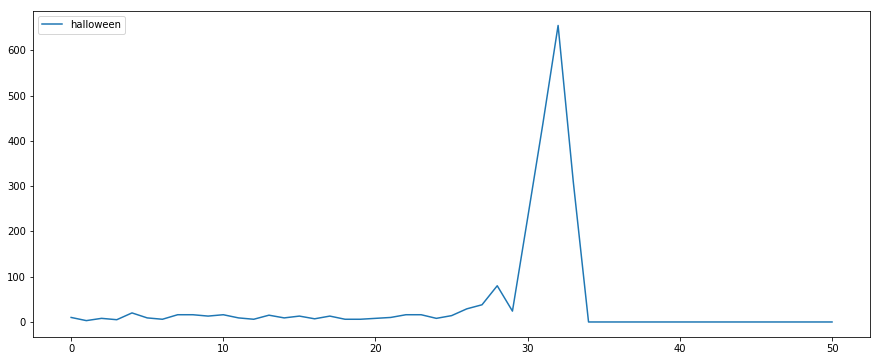

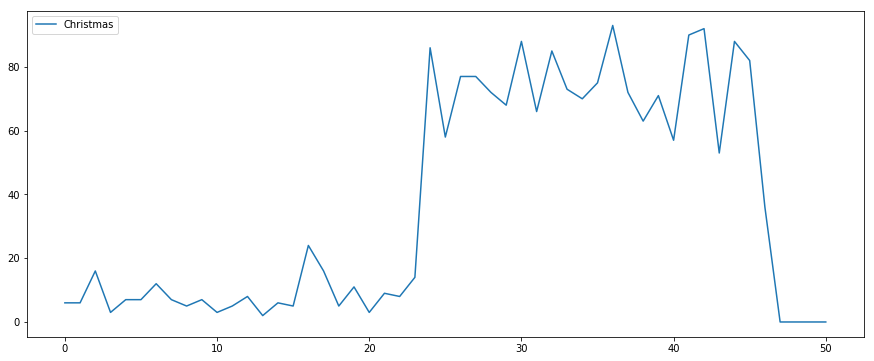

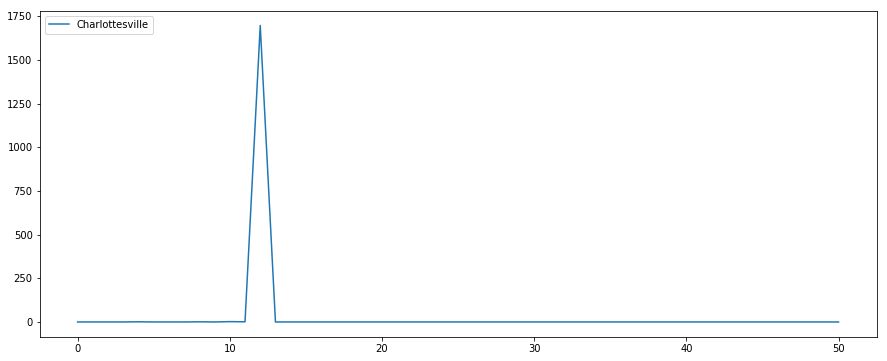

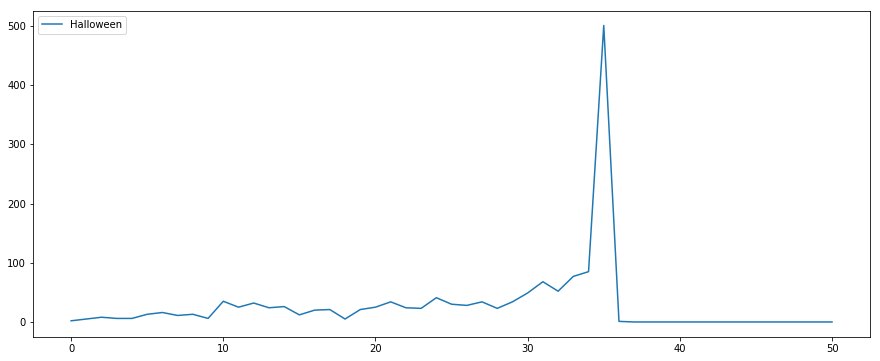

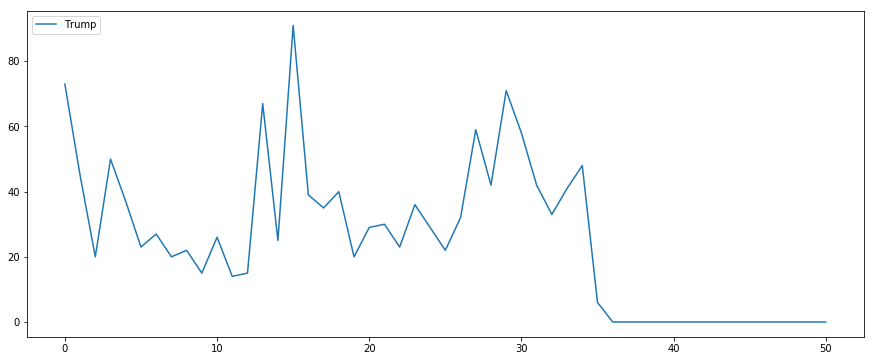

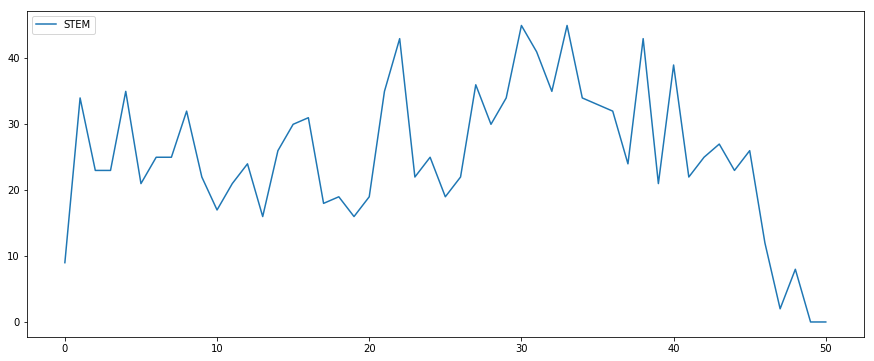

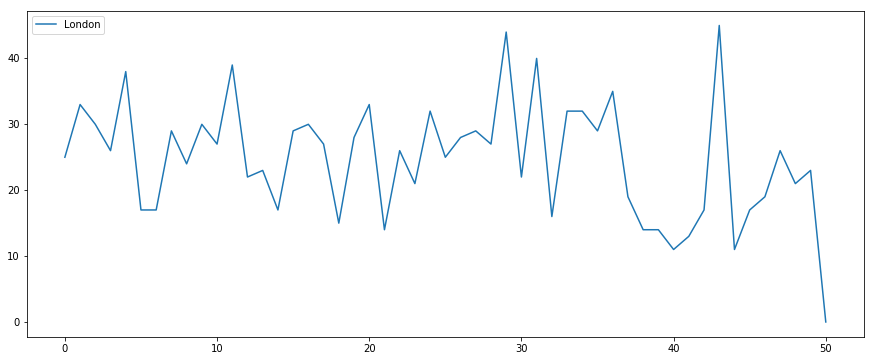

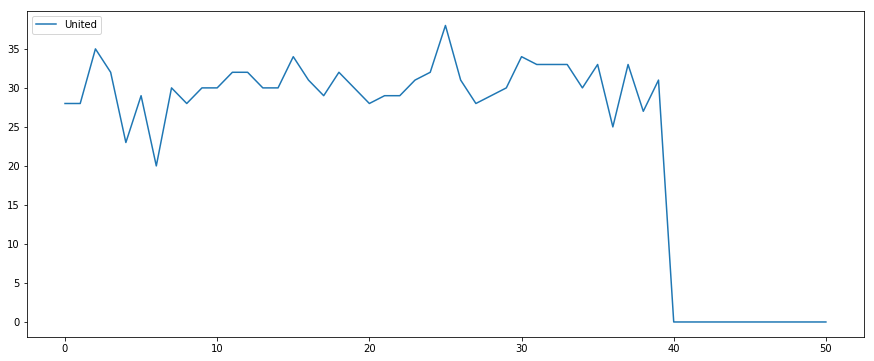

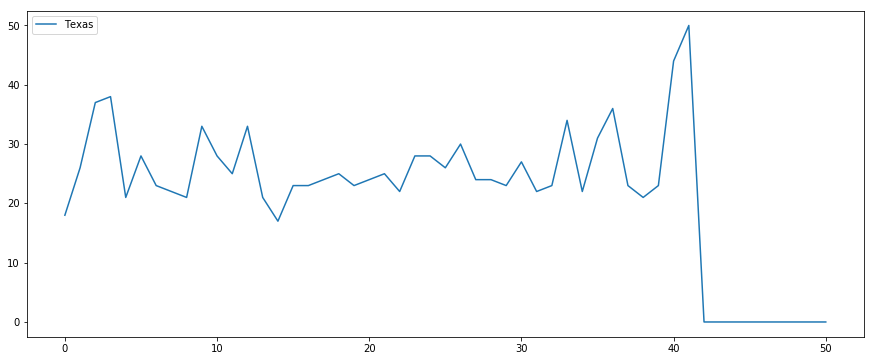

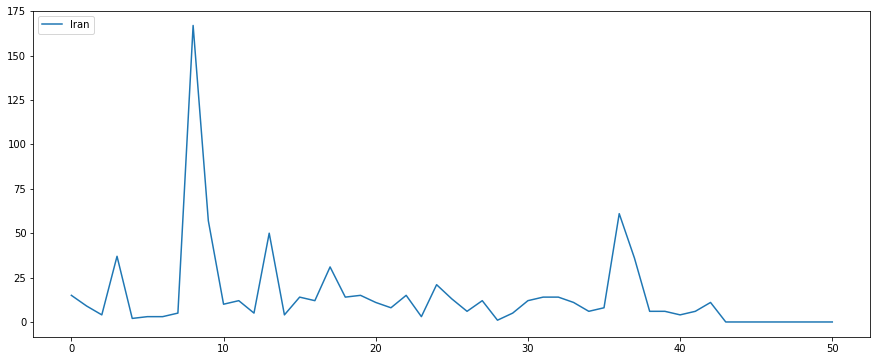

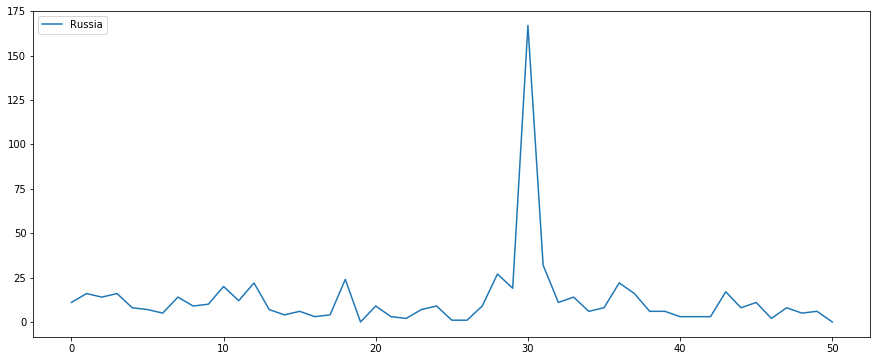

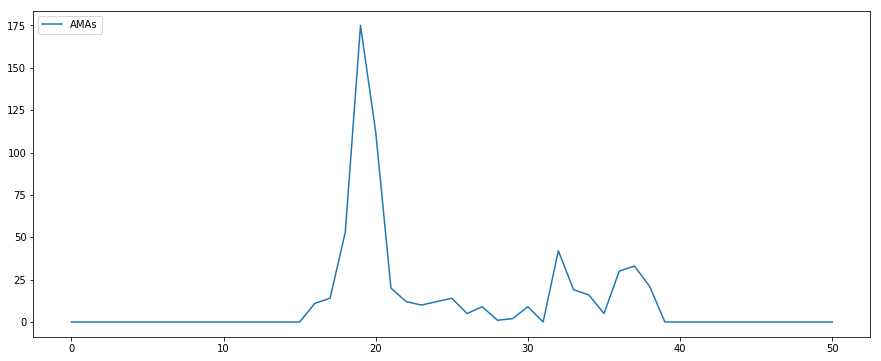

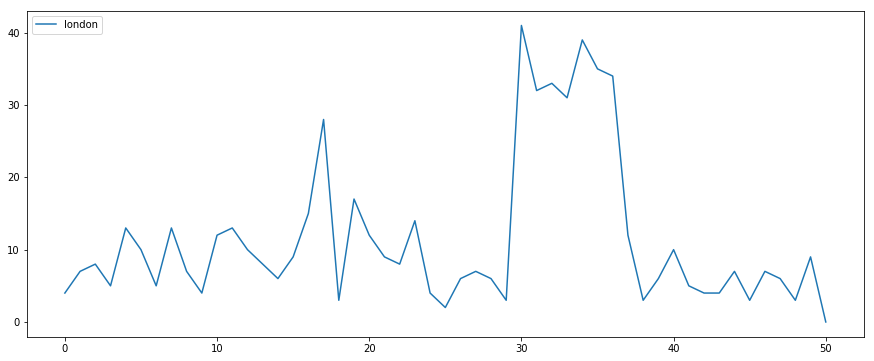

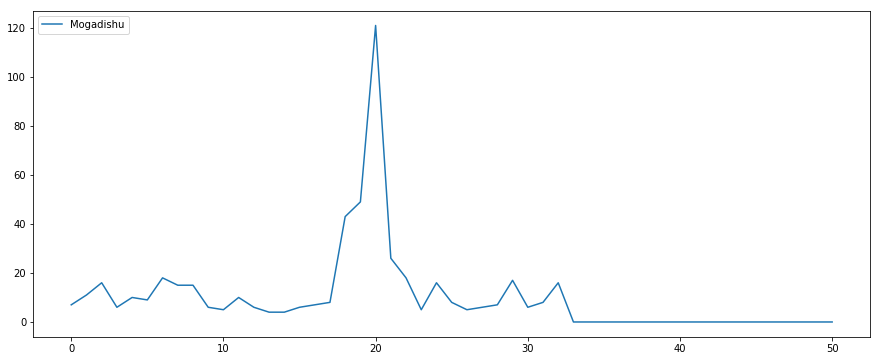

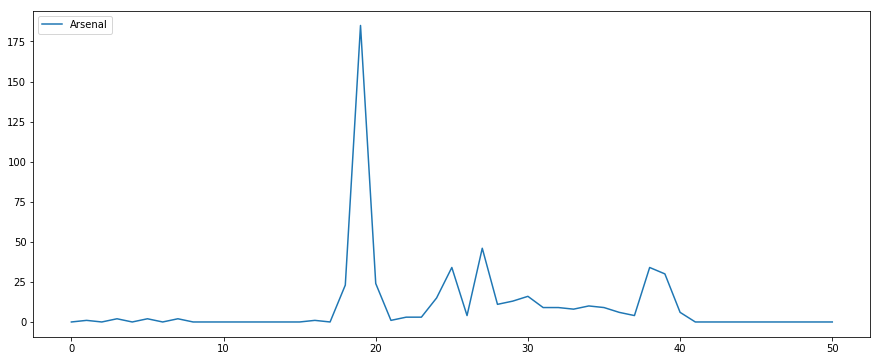

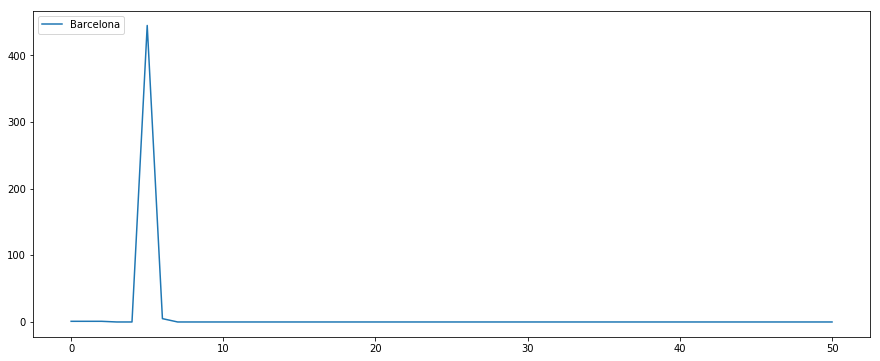

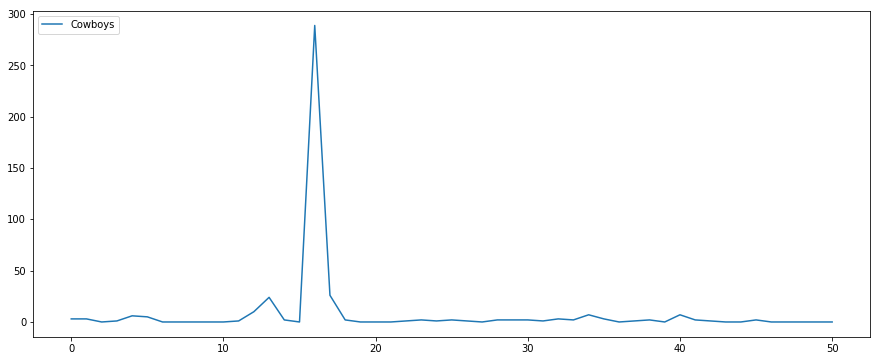

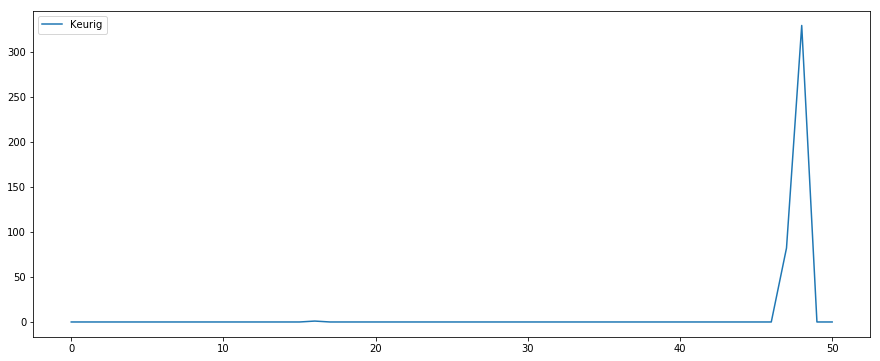

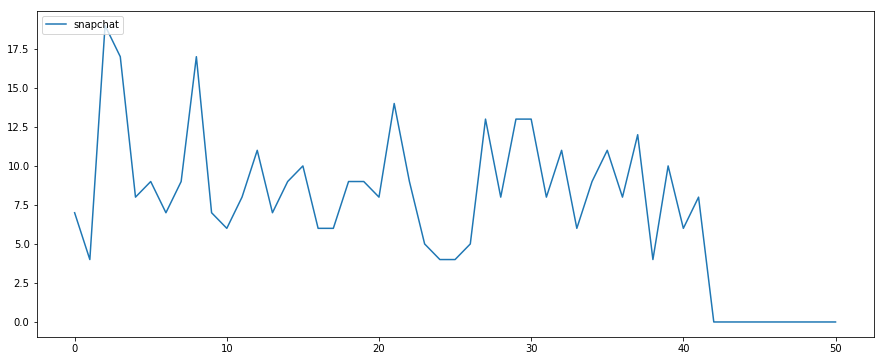

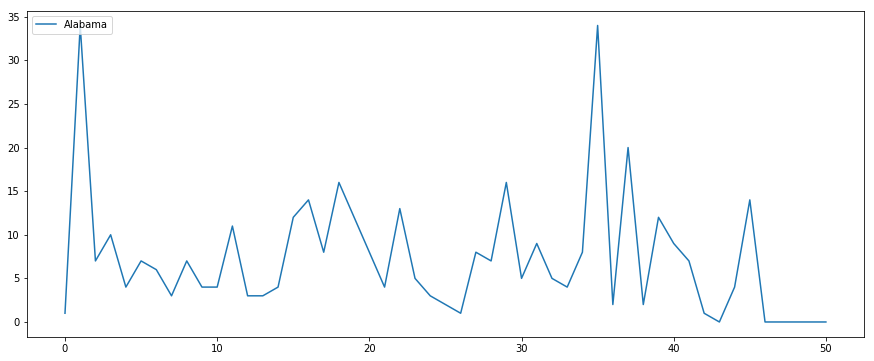

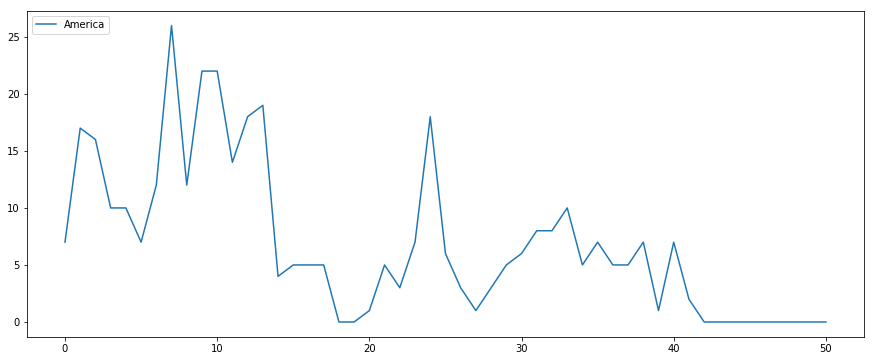

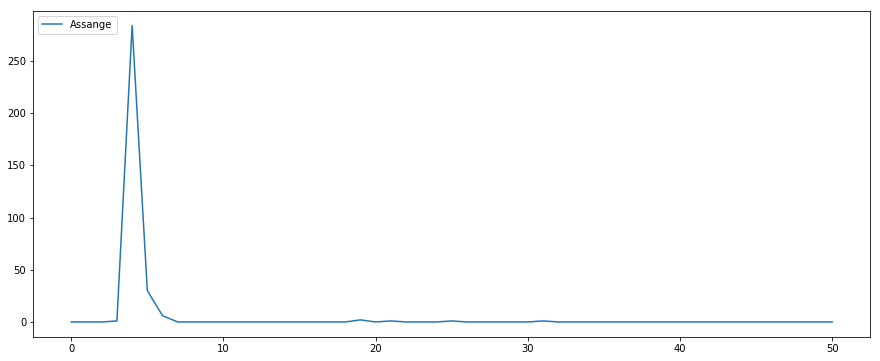

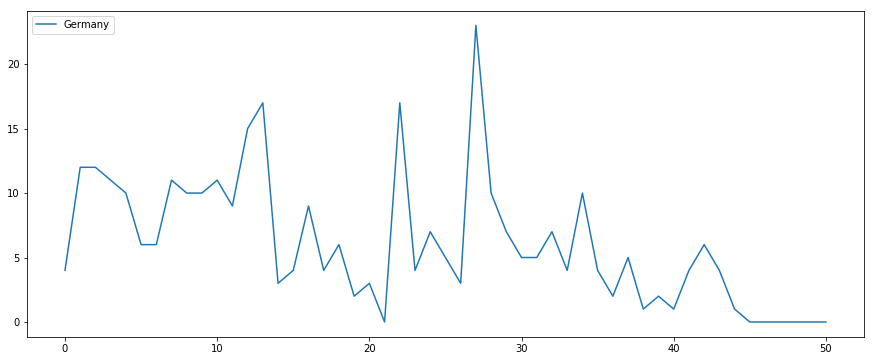

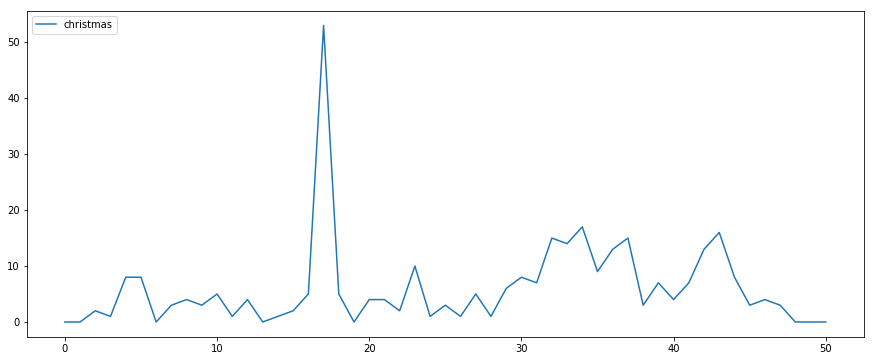

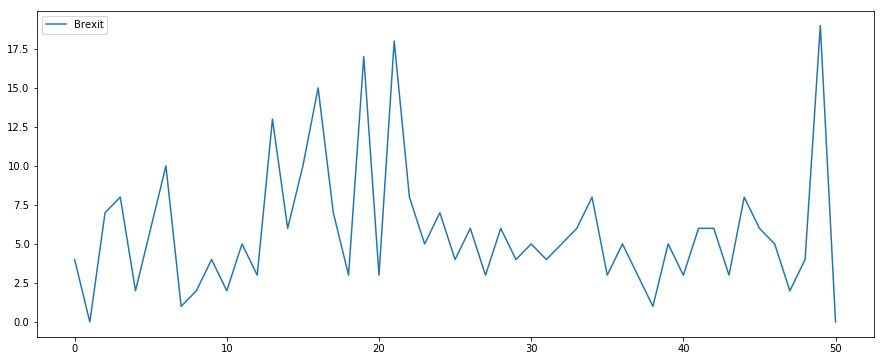

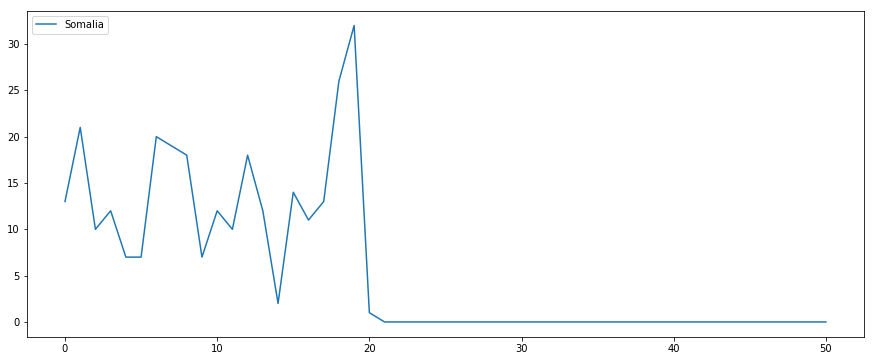

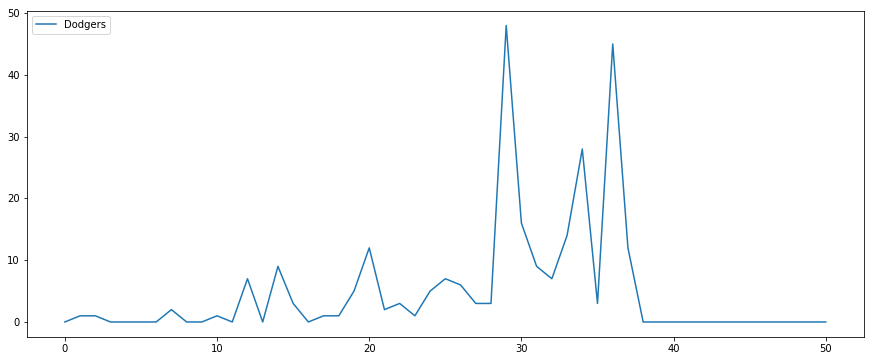

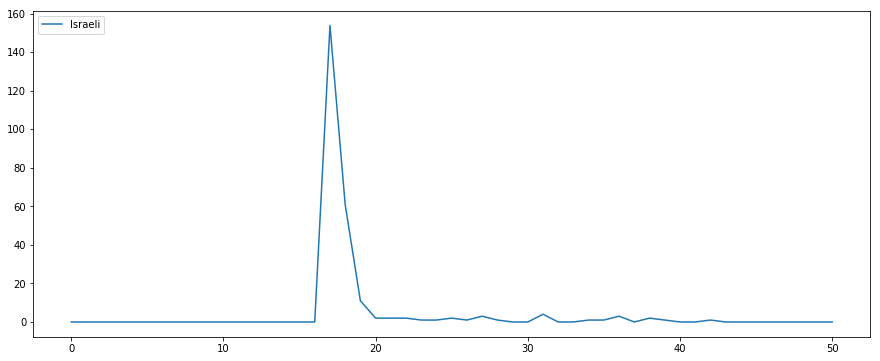

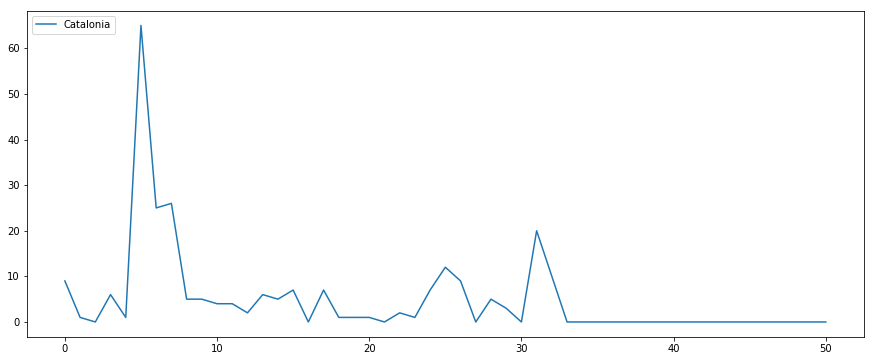

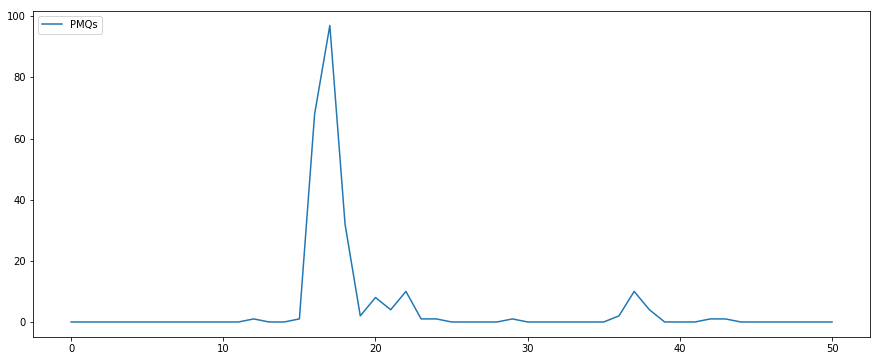

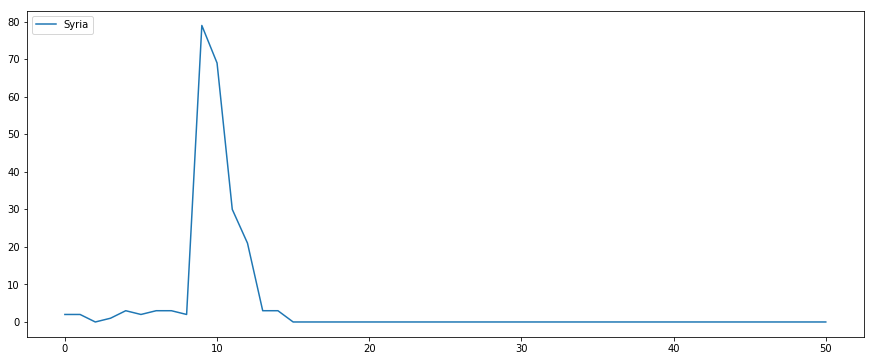

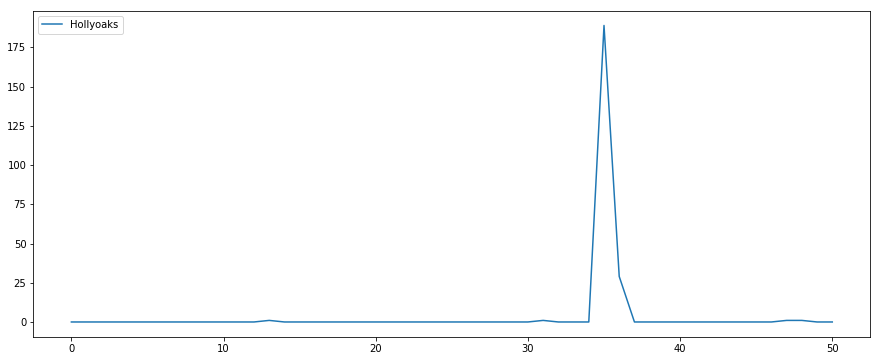

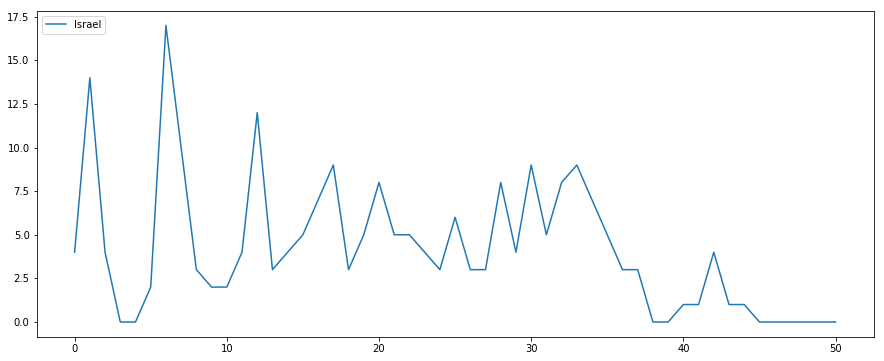

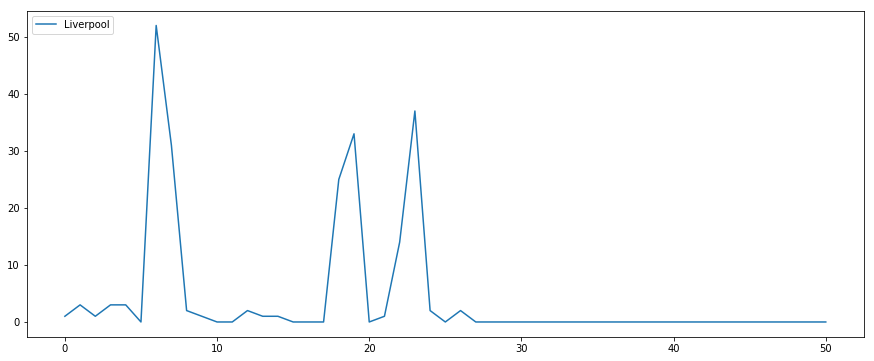

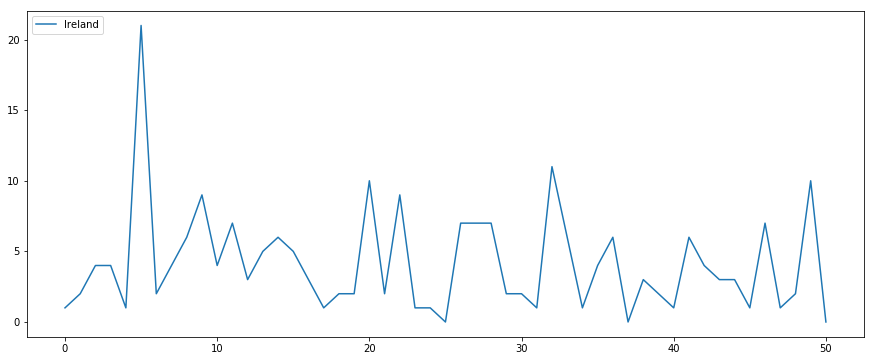

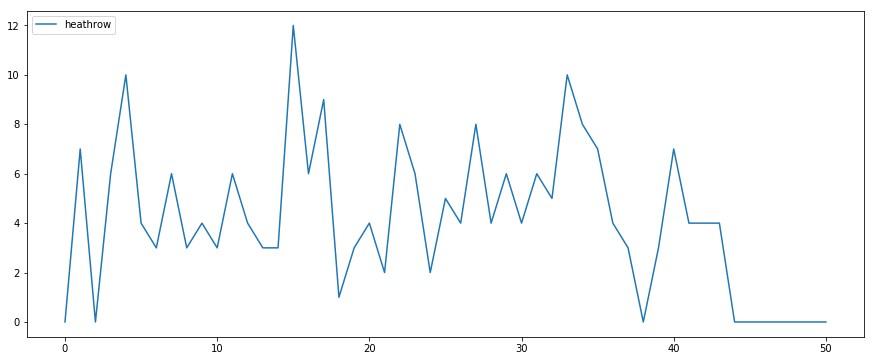

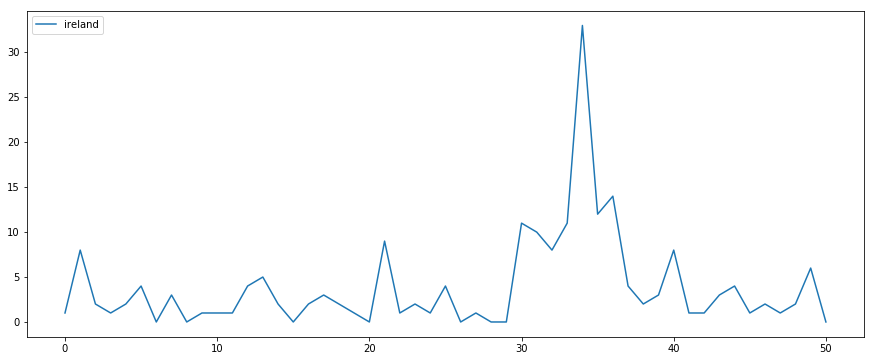

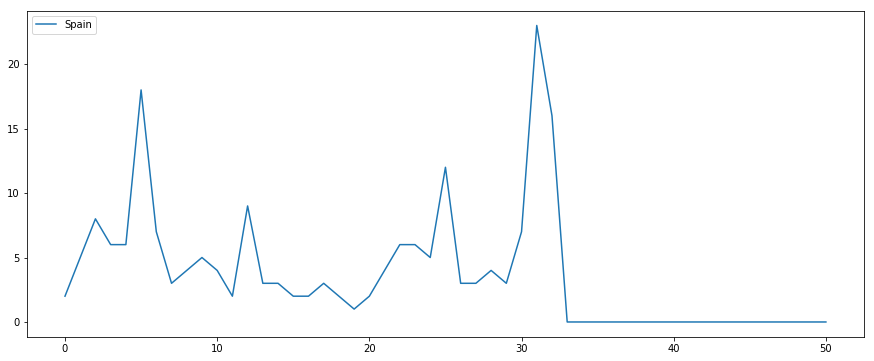

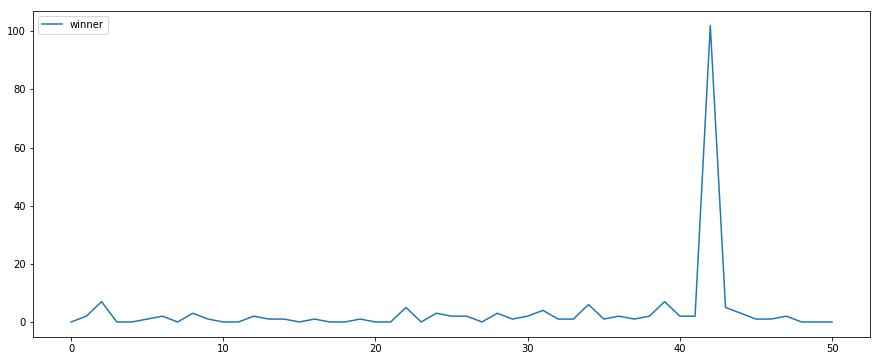

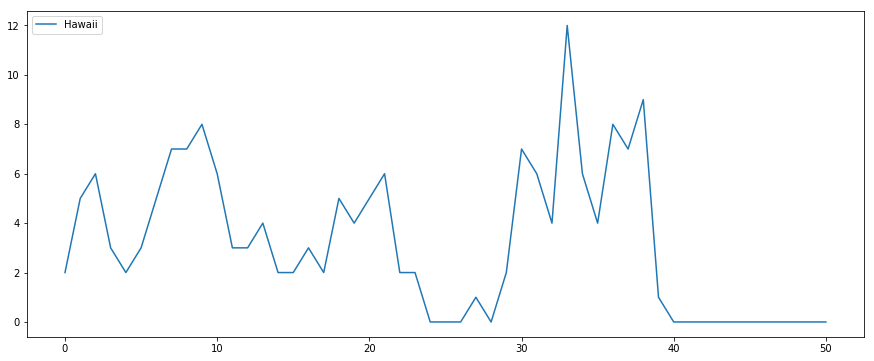

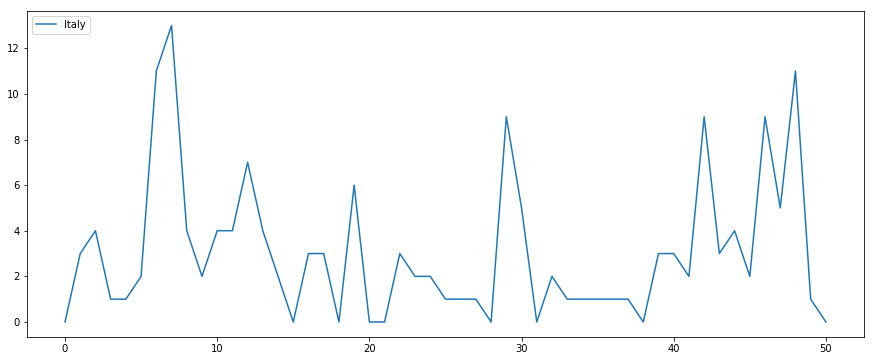

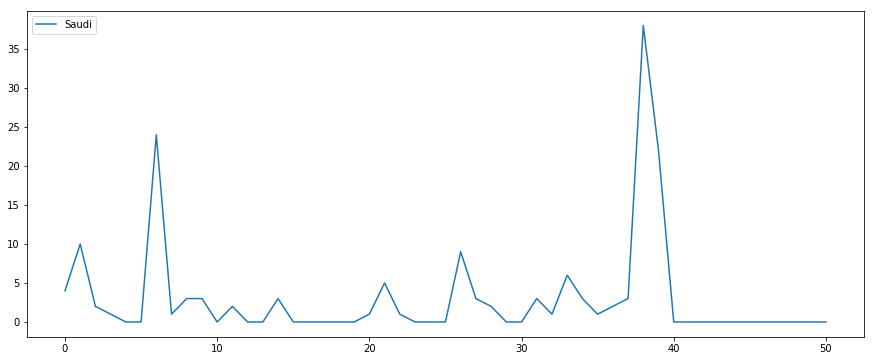

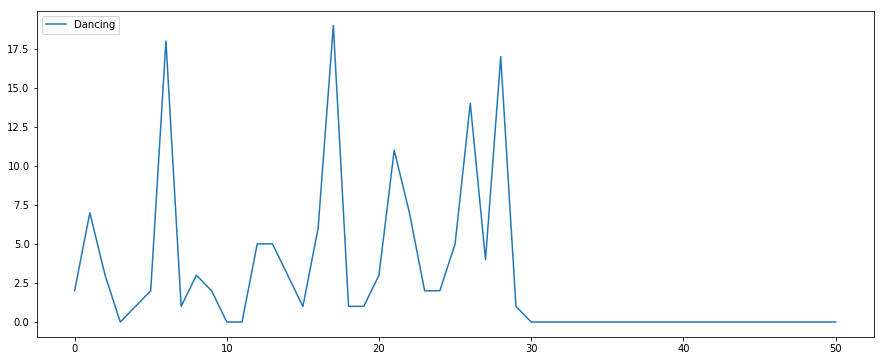

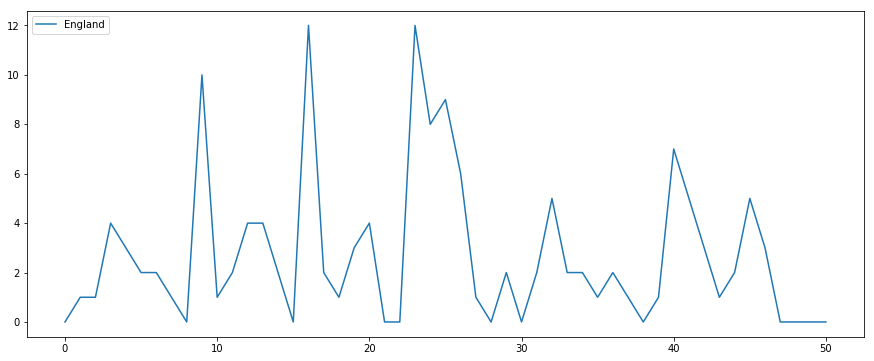

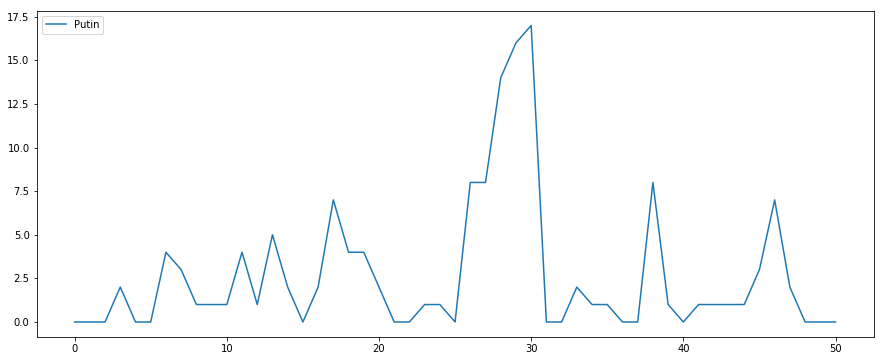

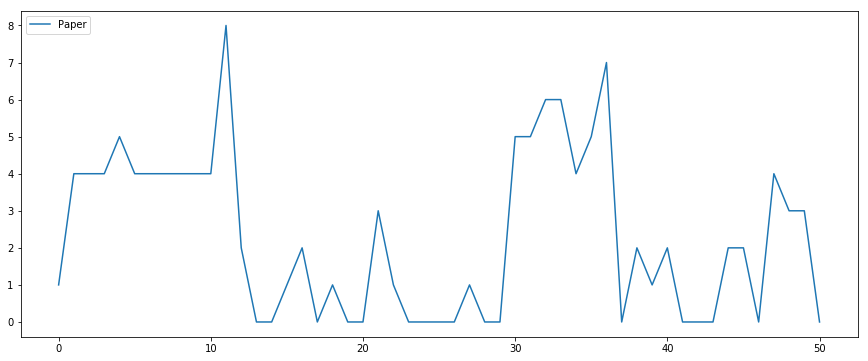

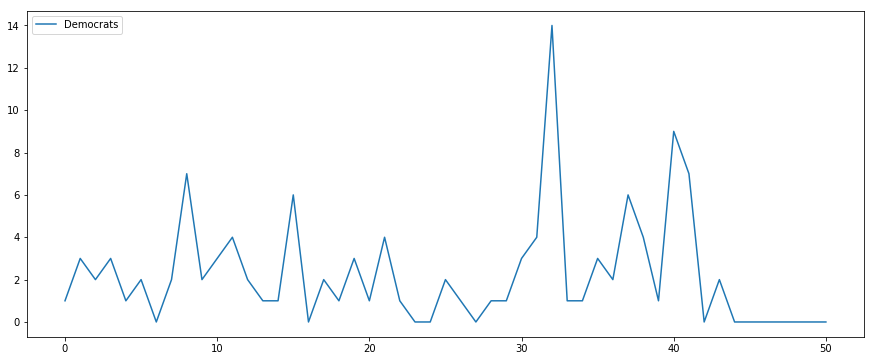

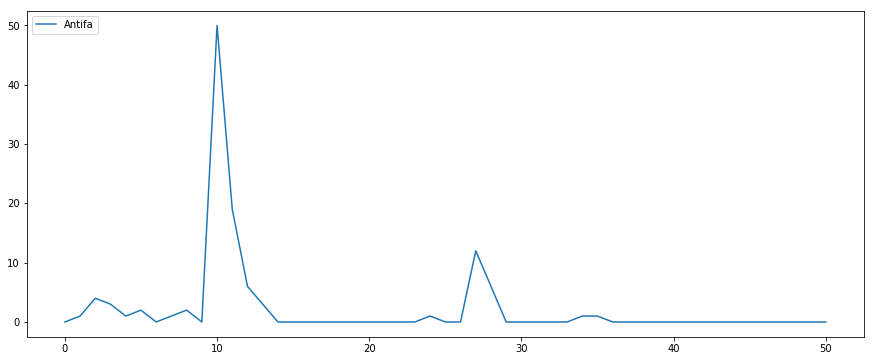

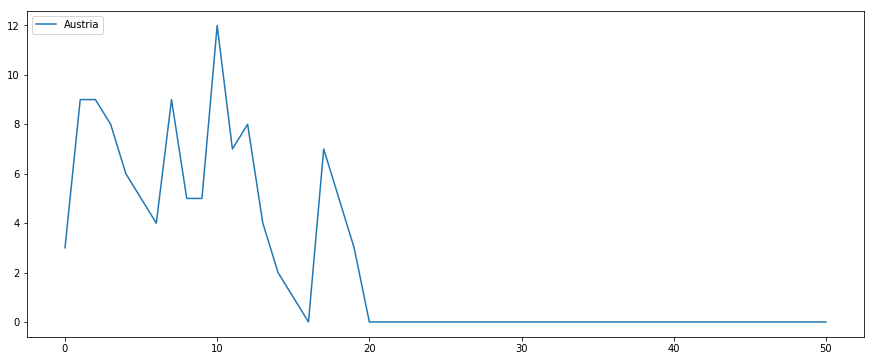

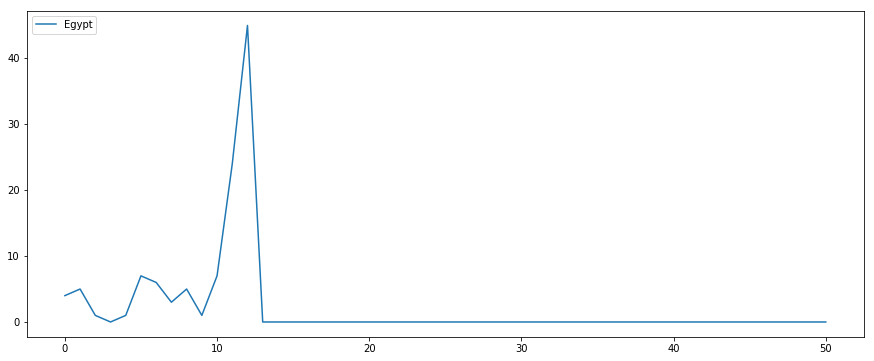

In [2]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

def main():
    #[1,3,6,12,24]
    hour = 24
    df = pd.read_csv('df_hts_is_trending_last_ts_' + str(hour) + 'h.csv')
    for i, ht in enumerate(df.columns[1:]):
        plt.figure(i)
        #plt.yscale('log')
        plt.plot(df[ht])
        plt.legend(loc='upper left')

if __name__ == '__main__':
    main()

In [9]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join
    
def main(hour):
    mypath = 'tweets_filtered/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    freq = str(hour) + 'H'
    period = 51*(24/hour)
    rng = pd.date_range('26/09/2017', periods=period, freq=freq)
    df = pd.DataFrame(index=rng)
    hts = {}
    with open('count_all_hts') as f:
        count = 0
        for l in f:
            count += 1
            if count > 2000:
                break
            d = json.loads(l)
            hts[d[0]] = ''
            
    for fpath in onlyfiles:
        with open('data/tweets/'+fpath) as f:
            for line_index, line in enumerate(f):
                if line_index == 0:
                    print(str(hour) + ': ' + fpath)
                tweet = json.loads(line)
                tweet_time = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
                for ht in tweet['hashtags']:
                    ht_name = ht['text'].lower()
                    
                    if ht_name not in hts:
                        continue
                    if ht_name not in df.columns:
                        df[ht_name] = pd.Series(data=np.zeros(len(rng),dtype=np.int), index=rng, name=ht_name)
                    
                    '''
                    s =  pd.Series(data=np.zeros(len(rng)), index=rng, name=ht_name)
                    try:
                        if isfile('count_hts_from_tweets_' + str(hour) + 'h/df_count_hts_' + ht_name):
                            s = pd.read_csv('count_hts_from_tweets_' + str(hour) + 'h/df_count_hts_' + ht_name,
                                            index_col=0, 
                                            header=None, 
                                            parse_dates=True,  squeeze=True)
                            s = s.rename(ht_name)
                            s = s.reindex(rng)
                    except:
                        continue
                    '''
                    ts = tweet_time
                    for i in range(0,len(rng)-1):
                        if ts >= rng[i] and ts < rng[i+1]:
                            #s[i] += 1
                            df.at[rng[i],ht_name] += 1
                            break
                    #s.to_csv('count_hts_from_tweets_' + str(hour) + 'h/df_count_hts_' + ht_name)
    df.to_csv('count_hts_from_tweets_' + str(hour) + 'h.csv')
                    
if __name__ == '__main__':
    for hour in [3,6,12,24]:
        main(hour)
        

3: stream_tweets-20170926-182453.txt
3: stream_tweets-20170926-220410.txt
3: stream_tweets-20170927-010032.txt
3: stream_tweets-20170927-035451.txt
3: stream_tweets-20170927-064955.txt
3: stream_tweets-20170927-093042.txt
3: stream_tweets-20170927-122426.txt
3: stream_tweets-20170927-162546.txt
3: stream_tweets-20170927-200537.txt
3: stream_tweets-20170927-224442.txt
3: stream_tweets-20170928-011444.txt
3: stream_tweets-20170928-035012.txt
3: stream_tweets-20170928-063526.txt
3: stream_tweets-20170928-092151.txt
3: stream_tweets-20170928-120047.txt
3: stream_tweets-20170928-145527.txt
3: stream_tweets-20170928-181808.txt
3: stream_tweets-20170928-204016.txt
3: stream_tweets-20170928-231333.txt
3: stream_tweets-20170929-014756.txt
3: stream_tweets-20170929-043303.txt
3: stream_tweets-20170929-070622.txt
3: stream_tweets-20170929-092609.txt
3: stream_tweets-20170929-111029.txt
3: stream_tweets-20170929-130852.txt
3: stream_tweets-20170929-151044.txt
3: stream_tweets-20170929-174612.txt
3

3: stream_tweets-20171018-192508.txt
3: stream_tweets-20171018-215043.txt
3: stream_tweets-20171018-233841.txt
3: stream_tweets-20171019-014927.txt
3: stream_tweets-20171019-035531.txt
3: stream_tweets-20171019-055627.txt
3: stream_tweets-20171019-073825.txt
3: stream_tweets-20171019-091221.txt
3: stream_tweets-20171019-114309.txt
3: stream_tweets-20171019-135606.txt
3: stream_tweets-20171019-164329.txt
3: stream_tweets-20171019-192526.txt
3: stream_tweets-20171019-214832.txt
3: stream_tweets-20171020-000226.txt
3: stream_tweets-20171020-020056.txt
3: stream_tweets-20171020-040804.txt
3: stream_tweets-20171020-064311.txt
3: stream_tweets-20171020-083456.txt
3: stream_tweets-20171020-103156.txt
3: stream_tweets-20171020-121454.txt
3: stream_tweets-20171020-140643.txt
3: stream_tweets-20171020-165329.txt
3: stream_tweets-20171020-195312.txt
3: stream_tweets-20171020-221200.txt
3: stream_tweets-20171021-000118.txt
3: stream_tweets-20171021-021656.txt
3: stream_tweets-20171021-043701.txt
3

3: stream_tweets-20171110-004355.txt
3: stream_tweets-20171110-033804.txt
3: stream_tweets-20171110-063102.txt
3: stream_tweets-20171110-091628.txt
3: stream_tweets-20171110-122740.txt
3: stream_tweets-20171110-162629.txt
3: stream_tweets-20171110-203406.txt
3: stream_tweets-20171110-232639.txt
3: stream_tweets-20171111-022235.txt
3: stream_tweets-20171111-051639.txt
3: stream_tweets-20171111-073315.txt
3: stream_tweets-20171111-094138.txt
3: stream_tweets-20171111-120626.txt
3: stream_tweets-20171111-144034.txt
3: stream_tweets-20171111-172705.txt
3: stream_tweets-20171111-200050.txt
3: stream_tweets-20171111-221310.txt
3: stream_tweets-20171112-005229.txt
3: stream_tweets-20171112-040513.txt
3: stream_tweets-20171112-063412.txt
3: stream_tweets-20171112-085609.txt
3: stream_tweets-20171112-111212.txt
3: stream_tweets-20171112-135313.txt
3: stream_tweets-20171112-165348.txt
3: stream_tweets-20171112-193156.txt
3: stream_tweets-20171112-215225.txt
3: stream_tweets-20171113-001128.txt
3

6: stream_tweets-20171014-144236.txt
6: stream_tweets-20171014-164206.txt
6: stream_tweets-20171014-190338.txt
6: stream_tweets-20171014-213737.txt
6: stream_tweets-20171014-231034.txt
6: stream_tweets-20171015-011400.txt
6: stream_tweets-20171015-030604.txt
6: stream_tweets-20171015-050929.txt
6: stream_tweets-20171015-072000.txt
6: stream_tweets-20171015-091314.txt
6: stream_tweets-20171015-111630.txt
6: stream_tweets-20171015-130557.txt
6: stream_tweets-20171015-150110.txt
6: stream_tweets-20171015-172550.txt
6: stream_tweets-20171015-194122.txt
6: stream_tweets-20171015-213622.txt
6: stream_tweets-20171015-232446.txt
6: stream_tweets-20171016-010008.txt
6: stream_tweets-20171016-022036.txt
6: stream_tweets-20171016-034222.txt
6: stream_tweets-20171016-051811.txt
6: stream_tweets-20171016-065648.txt
6: stream_tweets-20171016-083307.txt
6: stream_tweets-20171016-101214.txt
6: stream_tweets-20171016-115152.txt
6: stream_tweets-20171016-134527.txt
6: stream_tweets-20171016-154922.txt
6

6: stream_tweets-20171103-190243.txt
6: stream_tweets-20171103-224406.txt
6: stream_tweets-20171104-013115.txt
6: stream_tweets-20171104-050832.txt
6: stream_tweets-20171104-090005.txt
6: stream_tweets-20171104-125906.txt
6: stream_tweets-20171104-172900.txt
6: stream_tweets-20171104-212757.txt
6: stream_tweets-20171105-001749.txt
6: stream_tweets-20171105-031041.txt
6: stream_tweets-20171105-070026.txt
6: stream_tweets-20171105-102026.txt
6: stream_tweets-20171105-140617.txt
6: stream_tweets-20171105-185051.txt
6: stream_tweets-20171105-204926.txt
6: stream_tweets-20171105-213031.txt
6: stream_tweets-20171105-222102.txt
6: stream_tweets-20171105-233247.txt
6: stream_tweets-20171106-004144.txt
6: stream_tweets-20171106-024201.txt
6: stream_tweets-20171106-051242.txt
6: stream_tweets-20171106-074918.txt
6: stream_tweets-20171106-103819.txt
6: stream_tweets-20171106-131245.txt
6: stream_tweets-20171106-165854.txt
6: stream_tweets-20171106-204611.txt
6: stream_tweets-20171106-231454.txt
6

12: stream_tweets-20171009-182127.txt
12: stream_tweets-20171009-205418.txt
12: stream_tweets-20171009-225439.txt
12: stream_tweets-20171010-011508.txt
12: stream_tweets-20171010-031233.txt
12: stream_tweets-20171010-052402.txt
12: stream_tweets-20171010-075055.txt
12: stream_tweets-20171010-102349.txt
12: stream_tweets-20171010-123012.txt
12: stream_tweets-20171010-142235.txt
12: stream_tweets-20171010-163306.txt
12: stream_tweets-20171010-182025.txt
12: stream_tweets-20171010-200855.txt
12: stream_tweets-20171010-214808.txt
12: stream_tweets-20171010-230727.txt
12: stream_tweets-20171011-020540.txt
12: stream_tweets-20171011-043415.txt
12: stream_tweets-20171011-062601.txt
12: stream_tweets-20171011-085439.txt
12: stream_tweets-20171011-110940.txt
12: stream_tweets-20171011-133837.txt
12: stream_tweets-20171011-163606.txt
12: stream_tweets-20171011-192354.txt
12: stream_tweets-20171011-214521.txt
12: stream_tweets-20171011-235640.txt
12: stream_tweets-20171012-015258.txt
12: stream_t

12: stream_tweets-20171029-084756.txt
12: stream_tweets-20171029-111408.txt
12: stream_tweets-20171029-134358.txt
12: stream_tweets-20171029-163008.txt
12: stream_tweets-20171029-185632.txt
12: stream_tweets-20171029-205414.txt
12: stream_tweets-20171029-223748.txt
12: stream_tweets-20171030-001611.txt
12: stream_tweets-20171030-020345.txt
12: stream_tweets-20171030-040107.txt
12: stream_tweets-20171030-061021.txt
12: stream_tweets-20171030-083040.txt
12: stream_tweets-20171030-105743.txt
12: stream_tweets-20171030-132514.txt
12: stream_tweets-20171030-160152.txt
12: stream_tweets-20171030-182235.txt
12: stream_tweets-20171030-201157.txt
12: stream_tweets-20171030-214449.txt
12: stream_tweets-20171030-232140.txt
12: stream_tweets-20171031-004708.txt
12: stream_tweets-20171031-022940.txt
12: stream_tweets-20171031-041448.txt
12: stream_tweets-20171031-061439.txt
12: stream_tweets-20171031-082932.txt
12: stream_tweets-20171031-103107.txt
12: stream_tweets-20171031-130255.txt
12: stream_t

24: stream_tweets-20171003-005922.txt
24: stream_tweets-20171003-025644.txt
24: stream_tweets-20171003-050749.txt
24: stream_tweets-20171003-081125.txt
24: stream_tweets-20171003-103459.txt
24: stream_tweets-20171003-132021.txt
24: stream_tweets-20171003-171355.txt
24: stream_tweets-20171003-210832.txt
24: stream_tweets-20171003-234602.txt
24: stream_tweets-20171004-023415.txt
24: stream_tweets-20171004-051729.txt
24: stream_tweets-20171004-083506.txt
24: stream_tweets-20171004-113348.txt
24: stream_tweets-20171004-150653.txt
24: stream_tweets-20171004-190931.txt
24: stream_tweets-20171004-220526.txt
24: stream_tweets-20171005-004104.txt
24: stream_tweets-20171005-031748.txt
24: stream_tweets-20171005-061338.txt
24: stream_tweets-20171005-091145.txt
24: stream_tweets-20171005-131049.txt
24: stream_tweets-20171005-183747.txt
24: stream_tweets-20171005-221830.txt
24: stream_tweets-20171006-004357.txt
24: stream_tweets-20171006-020524.txt
24: stream_tweets-20171006-035847.txt
24: stream_t

24: stream_tweets-20171023-182849.txt
24: stream_tweets-20171023-205906.txt
24: stream_tweets-20171023-231405.txt
24: stream_tweets-20171024-014441.txt
24: stream_tweets-20171024-033935.txt
24: stream_tweets-20171024-051500.txt
24: stream_tweets-20171024-070039.txt
24: stream_tweets-20171024-090932.txt
24: stream_tweets-20171024-112303.txt
24: stream_tweets-20171024-134901.txt
24: stream_tweets-20171024-162421.txt
24: stream_tweets-20171024-191659.txt
24: stream_tweets-20171024-213430.txt
24: stream_tweets-20171024-232006.txt
24: stream_tweets-20171025-011809.txt
24: stream_tweets-20171025-033613.txt
24: stream_tweets-20171025-045721.txt
24: stream_tweets-20171025-070304.txt
24: stream_tweets-20171025-091331.txt
24: stream_tweets-20171025-102515.txt
24: stream_tweets-20171025-124214.txt
24: stream_tweets-20171025-153550.txt
24: stream_tweets-20171025-190807.txt
24: stream_tweets-20171025-223133.txt
24: stream_tweets-20171026-011644.txt
24: stream_tweets-20171026-041706.txt
24: stream_t

24: stream_tweets-20171116-012802.txt


In [100]:
import pandas as pd
def main():
    trend = {}
    hour = 3
    lookback = int(24/hour)
    lookback_multiple = 5
    std_multiple = 6
    rng = pd.date_range('26/09/2017', periods=51, freq='D')
    df = pd.read_csv('count_hts_from_tweets_' + str(hour) + 'h.csv',index_col=0, parse_dates=True)
    df_mean = df.rolling(lookback*lookback_multiple).mean()
    df_std = df.rolling(lookback*lookback_multiple).std()
    df_z = df.subtract(df_mean.add(df_std.multiply(std_multiple, fill_value=0), fill_value=0), fill_value=0)
    x = 0
    for ts, row in df_z.iterrows():
        if ts < rng[lookback_multiple]:
            continue
        for ht_name in df_z.columns:
            if row[ht_name] > 0 and :
                print(df[ht_name][:ts])
                x += 1
                if x > 10:
                    return
                if not ht_name in trend:
                    trend[ht_name] = ts

if __name__ == '__main__':
    main()


2017-09-26 00:00:00      0
2017-09-26 03:00:00      0
2017-09-26 06:00:00      0
2017-09-26 09:00:00      0
2017-09-26 12:00:00      0
2017-09-26 15:00:00      0
2017-09-26 18:00:00      0
2017-09-26 21:00:00      0
2017-09-27 00:00:00      0
2017-09-27 03:00:00      0
2017-09-27 06:00:00      0
2017-09-27 09:00:00      0
2017-09-27 12:00:00      0
2017-09-27 15:00:00      0
2017-09-27 18:00:00      0
2017-09-27 21:00:00      0
2017-09-28 00:00:00      0
2017-09-28 03:00:00      0
2017-09-28 06:00:00      0
2017-09-28 09:00:00      0
2017-09-28 12:00:00      0
2017-09-28 15:00:00      0
2017-09-28 18:00:00      0
2017-09-28 21:00:00      0
2017-09-29 00:00:00      0
2017-09-29 03:00:00      0
2017-09-29 06:00:00      0
2017-09-29 09:00:00      1
2017-09-29 12:00:00      0
2017-09-29 15:00:00      0
2017-09-29 18:00:00      0
2017-09-29 21:00:00      0
2017-09-30 00:00:00      0
2017-09-30 03:00:00      0
2017-09-30 06:00:00      0
2017-09-30 09:00:00      0
2017-09-30 12:00:00      0
2

In [14]:
#hts_ts_list

import json
import pandas as pd
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join
    
def main():
    mypath = 'data/tweets/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    hts = {}
    with open('count_all_hts_new') as f:
        count = 0
        for l in f:
            count += 1
            if count > 2000:
                break
            d = json.loads(l)
            hts[d[0]] = ''
    hts_ts_list = {}        
    for fpath in onlyfiles:
        with open(mypath+fpath) as inputF:
            print(fpath)
            for line_index, line in enumerate(inputF):
                tweet = json.loads(line)
                for ht in tweet['hashtags']:
                    ht_name = ht['text'].lower()
                    if ht_name not in hts:
                        continue
                    if ht_name not in hts_ts_list:
                        hts_ts_list[ht_name] = []
                    tweet_time = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
                    tt = tweet_time.strftime("%Y%m%d-%H%M%S")
                    hts_ts_list[ht_name].append(tt)
    with open('hts_ts_list_new','a') as f:
        for k,v in hts_ts_list.items():
            f.write(json.dumps([k,v])+'\n')
                    
                    
if __name__ == '__main__':
    main()
        

stream_tweets-20170926-182453.txt
stream_tweets-20170926-220410.txt
stream_tweets-20170927-010032.txt
stream_tweets-20170927-035451.txt
stream_tweets-20170927-064955.txt
stream_tweets-20170927-093042.txt
stream_tweets-20170927-122426.txt
stream_tweets-20170927-162546.txt
stream_tweets-20170927-200537.txt
stream_tweets-20170927-224442.txt
stream_tweets-20170928-011444.txt
stream_tweets-20170928-035012.txt
stream_tweets-20170928-063526.txt
stream_tweets-20170928-092151.txt
stream_tweets-20170928-120047.txt
stream_tweets-20170928-145527.txt
stream_tweets-20170928-181808.txt
stream_tweets-20170928-204016.txt
stream_tweets-20170928-231333.txt
stream_tweets-20170929-014756.txt
stream_tweets-20170929-043303.txt
stream_tweets-20170929-070622.txt
stream_tweets-20170929-092609.txt
stream_tweets-20170929-111029.txt
stream_tweets-20170929-130852.txt
stream_tweets-20170929-151044.txt
stream_tweets-20170929-174612.txt
stream_tweets-20170929-203402.txt
stream_tweets-20170929-224219.txt
stream_tweets-

stream_tweets-20171020-121454.txt
stream_tweets-20171020-140643.txt
stream_tweets-20171020-165329.txt
stream_tweets-20171020-195312.txt
stream_tweets-20171020-221200.txt
stream_tweets-20171021-000118.txt
stream_tweets-20171021-021656.txt
stream_tweets-20171021-043701.txt
stream_tweets-20171021-063733.txt
stream_tweets-20171021-085957.txt
stream_tweets-20171021-112433.txt
stream_tweets-20171021-130957.txt
stream_tweets-20171021-145756.txt
stream_tweets-20171021-173243.txt
stream_tweets-20171021-193939.txt
stream_tweets-20171021-214107.txt
stream_tweets-20171021-234637.txt
stream_tweets-20171022-012054.txt
stream_tweets-20171022-031820.txt
stream_tweets-20171022-054136.txt
stream_tweets-20171022-074836.txt
stream_tweets-20171022-100640.txt
stream_tweets-20171022-124029.txt
stream_tweets-20171022-150538.txt
stream_tweets-20171022-174008.txt
stream_tweets-20171022-192250.txt
stream_tweets-20171022-214548.txt
stream_tweets-20171022-233611.txt
stream_tweets-20171023-013012.txt
stream_tweets-

stream_tweets-20171114-134801.txt
stream_tweets-20171114-175857.txt
stream_tweets-20171114-210548.txt
stream_tweets-20171115-000144.txt
stream_tweets-20171115-031808.txt
stream_tweets-20171115-065923.txt
stream_tweets-20171115-104700.txt
stream_tweets-20171115-142803.txt
stream_tweets-20171115-185831.txt
stream_tweets-20171115-222356.txt
stream_tweets-20171116-012802.txt
stream_tweets-20171202-152144.txt
stream_tweets-20171202-183446.txt
stream_tweets-20171202-210519.txt
stream_tweets-20171202-232916.txt
stream_tweets-20171203-020018.txt
stream_tweets-20171203-042712.txt
stream_tweets-20171203-064604.txt
stream_tweets-20171203-091922.txt
stream_tweets-20171203-115144.txt
stream_tweets-20171203-144238.txt
stream_tweets-20171203-175345.txt
stream_tweets-20171203-210249.txt
stream_tweets-20171203-234046.txt
stream_tweets-20171204-015258.txt
stream_tweets-20171204-035042.txt
stream_tweets-20171204-054910.txt
stream_tweets-20171204-082356.txt
stream_tweets-20171204-105759.txt
stream_tweets-

stream_tweets-20180103-062126.txt
stream_tweets-20180103-102906.txt
stream_tweets-20180103-145435.txt
stream_tweets-20180103-200838.txt
stream_tweets-20180103-235620.txt
stream_tweets-20180104-034619.txt
stream_tweets-20180104-074124.txt
stream_tweets-20180104-125658.txt
stream_tweets-20180104-174714.txt
stream_tweets-20180104-220239.txt
stream_tweets-20180105-011957.txt
stream_tweets-20180105-041802.txt
stream_tweets-20180105-080034.txt
stream_tweets-20180105-121750.txt
stream_tweets-20180105-171814.txt
stream_tweets-20180105-213114.txt
stream_tweets-20180105-235645.txt
stream_tweets-20180106-022918.txt
stream_tweets-20180106-055027.txt
stream_tweets-20180106-093313.txt
stream_tweets-20180106-130700.txt
stream_tweets-20180106-174242.txt
stream_tweets-20180106-220355.txt
stream_tweets-20180107-014847.txt
stream_tweets-20180107-055230.txt
stream_tweets-20180107-101838.txt
stream_tweets-20180107-190713.txt
stream_tweets-20180107-223607.txt
stream_tweets-20180108-013429.txt
stream_tweets-

stream_tweets-20180206-185612.txt
stream_tweets-20180206-224624.txt
stream_tweets-20180207-012124.txt
stream_tweets-20180207-043435.txt
stream_tweets-20180207-083519.txt
stream_tweets-20180207-124925.txt
stream_tweets-20180207-181843.txt
stream_tweets-20180207-213348.txt
stream_tweets-20180208-004258.txt
stream_tweets-20180208-042446.txt
stream_tweets-20180208-080212.txt
stream_tweets-20180208-112505.txt
stream_tweets-20180208-160720.txt
stream_tweets-20180208-204621.txt
stream_tweets-20180208-231035.txt
stream_tweets-20180209-022459.txt
stream_tweets-20180209-062021.txt
stream_tweets-20180209-095859.txt
stream_tweets-20180209-143859.txt
stream_tweets-20180209-200243.txt
stream_tweets-20180209-234832.txt
stream_tweets-20180210-035302.txt
stream_tweets-20180210-075849.txt
stream_tweets-20180210-115906.txt
stream_tweets-20180210-170811.txt
stream_tweets-20180210-215029.txt
stream_tweets-20180211-011950.txt
stream_tweets-20180211-050730.txt
stream_tweets-20180211-090014.txt
stream_tweets-

In [115]:
#frequency
#hts_ts_list

import json
import pandas as pd
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join
    
def main():
    hts_diff = {}
    with open('hts_ts_list') as f:
        count = 0
        for line in f:
            count += 1
            print(count)
            d = json.loads(line)
            ts_list = [ datetime.strptime(x, "%Y%m%d-%H%M%S") for x in d[1] ]
            diff_list = []
            for i in range(0,len(ts_list)-1):
                x = ts_list[i+1] - ts_list[i]
                (m, s) = divmod(x.days * 86400 + x.seconds, 60)
                diff_list.append(m)
            hts_diff[d[0]] = diff_list
    with open('hts_freq_diff_list','a') as f:
        for k,v in hts_diff.items():
            f.write(json.dumps([k,np.mean(v),v])+'\n')

            
                    
                    
if __name__ == '__main__':
    main()
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000


In [111]:
a = [1,2,3,4,5]
print( a[1:] - a[:-1])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [13]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join
    
def main():
    mypath = 'data/tweets/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    hts = {}
    with open('count_all_hts_new') as f:
        count = 0
        for l in f:
            count += 1
            if count > 2000:
                break
            d = json.loads(l)
            hts[d[0]] = ''
            
    for fpath in onlyfiles:
        with open('data/tweets/'+fpath) as inputF, open('new_tweets_filtered_top2000/' +fpath, 'a') as outF:
            print(fpath)
            for line_index, line in enumerate(inputF):
                tweet = json.loads(line)
                for ht in tweet['hashtags']:
                    ht_name = ht['text'].lower()
                    if ht_name not in hts:
                        continue
                    outF.write(json.dumps(tweet)+'\n')
                    break
                    
if __name__ == '__main__':
    main()
        

stream_tweets-20170926-182453.txt
stream_tweets-20170926-220410.txt
stream_tweets-20170927-010032.txt
stream_tweets-20170927-035451.txt
stream_tweets-20170927-064955.txt
stream_tweets-20170927-093042.txt
stream_tweets-20170927-122426.txt
stream_tweets-20170927-162546.txt
stream_tweets-20170927-200537.txt
stream_tweets-20170927-224442.txt
stream_tweets-20170928-011444.txt
stream_tweets-20170928-035012.txt
stream_tweets-20170928-063526.txt
stream_tweets-20170928-092151.txt
stream_tweets-20170928-120047.txt
stream_tweets-20170928-145527.txt
stream_tweets-20170928-181808.txt
stream_tweets-20170928-204016.txt
stream_tweets-20170928-231333.txt
stream_tweets-20170929-014756.txt
stream_tweets-20170929-043303.txt
stream_tweets-20170929-070622.txt
stream_tweets-20170929-092609.txt
stream_tweets-20170929-111029.txt
stream_tweets-20170929-130852.txt
stream_tweets-20170929-151044.txt
stream_tweets-20170929-174612.txt
stream_tweets-20170929-203402.txt
stream_tweets-20170929-224219.txt
stream_tweets-

stream_tweets-20171020-121454.txt
stream_tweets-20171020-140643.txt
stream_tweets-20171020-165329.txt
stream_tweets-20171020-195312.txt
stream_tweets-20171020-221200.txt
stream_tweets-20171021-000118.txt
stream_tweets-20171021-021656.txt
stream_tweets-20171021-043701.txt
stream_tweets-20171021-063733.txt
stream_tweets-20171021-085957.txt
stream_tweets-20171021-112433.txt
stream_tweets-20171021-130957.txt
stream_tweets-20171021-145756.txt
stream_tweets-20171021-173243.txt
stream_tweets-20171021-193939.txt
stream_tweets-20171021-214107.txt
stream_tweets-20171021-234637.txt
stream_tweets-20171022-012054.txt
stream_tweets-20171022-031820.txt
stream_tweets-20171022-054136.txt
stream_tweets-20171022-074836.txt
stream_tweets-20171022-100640.txt
stream_tweets-20171022-124029.txt
stream_tweets-20171022-150538.txt
stream_tweets-20171022-174008.txt
stream_tweets-20171022-192250.txt
stream_tweets-20171022-214548.txt
stream_tweets-20171022-233611.txt
stream_tweets-20171023-013012.txt
stream_tweets-

stream_tweets-20171114-134801.txt
stream_tweets-20171114-175857.txt
stream_tweets-20171114-210548.txt
stream_tweets-20171115-000144.txt
stream_tweets-20171115-031808.txt
stream_tweets-20171115-065923.txt
stream_tweets-20171115-104700.txt
stream_tweets-20171115-142803.txt
stream_tweets-20171115-185831.txt
stream_tweets-20171115-222356.txt
stream_tweets-20171116-012802.txt
stream_tweets-20171202-152144.txt
stream_tweets-20171202-183446.txt
stream_tweets-20171202-210519.txt
stream_tweets-20171202-232916.txt
stream_tweets-20171203-020018.txt
stream_tweets-20171203-042712.txt
stream_tweets-20171203-064604.txt
stream_tweets-20171203-091922.txt
stream_tweets-20171203-115144.txt
stream_tweets-20171203-144238.txt
stream_tweets-20171203-175345.txt
stream_tweets-20171203-210249.txt
stream_tweets-20171203-234046.txt
stream_tweets-20171204-015258.txt
stream_tweets-20171204-035042.txt
stream_tweets-20171204-054910.txt
stream_tweets-20171204-082356.txt
stream_tweets-20171204-105759.txt
stream_tweets-

stream_tweets-20180103-062126.txt
stream_tweets-20180103-102906.txt
stream_tweets-20180103-145435.txt
stream_tweets-20180103-200838.txt
stream_tweets-20180103-235620.txt
stream_tweets-20180104-034619.txt
stream_tweets-20180104-074124.txt
stream_tweets-20180104-125658.txt
stream_tweets-20180104-174714.txt
stream_tweets-20180104-220239.txt
stream_tweets-20180105-011957.txt
stream_tweets-20180105-041802.txt
stream_tweets-20180105-080034.txt
stream_tweets-20180105-121750.txt
stream_tweets-20180105-171814.txt
stream_tweets-20180105-213114.txt
stream_tweets-20180105-235645.txt
stream_tweets-20180106-022918.txt
stream_tweets-20180106-055027.txt
stream_tweets-20180106-093313.txt
stream_tweets-20180106-130700.txt
stream_tweets-20180106-174242.txt
stream_tweets-20180106-220355.txt
stream_tweets-20180107-014847.txt
stream_tweets-20180107-055230.txt
stream_tweets-20180107-101838.txt
stream_tweets-20180107-190713.txt
stream_tweets-20180107-223607.txt
stream_tweets-20180108-013429.txt
stream_tweets-

stream_tweets-20180206-185612.txt
stream_tweets-20180206-224624.txt
stream_tweets-20180207-012124.txt
stream_tweets-20180207-043435.txt
stream_tweets-20180207-083519.txt
stream_tweets-20180207-124925.txt
stream_tweets-20180207-181843.txt
stream_tweets-20180207-213348.txt
stream_tweets-20180208-004258.txt
stream_tweets-20180208-042446.txt
stream_tweets-20180208-080212.txt
stream_tweets-20180208-112505.txt
stream_tweets-20180208-160720.txt
stream_tweets-20180208-204621.txt
stream_tweets-20180208-231035.txt
stream_tweets-20180209-022459.txt
stream_tweets-20180209-062021.txt
stream_tweets-20180209-095859.txt
stream_tweets-20180209-143859.txt
stream_tweets-20180209-200243.txt
stream_tweets-20180209-234832.txt
stream_tweets-20180210-035302.txt
stream_tweets-20180210-075849.txt
stream_tweets-20180210-115906.txt
stream_tweets-20180210-170811.txt
stream_tweets-20180210-215029.txt
stream_tweets-20180211-011950.txt
stream_tweets-20180211-050730.txt
stream_tweets-20180211-090014.txt
stream_tweets-

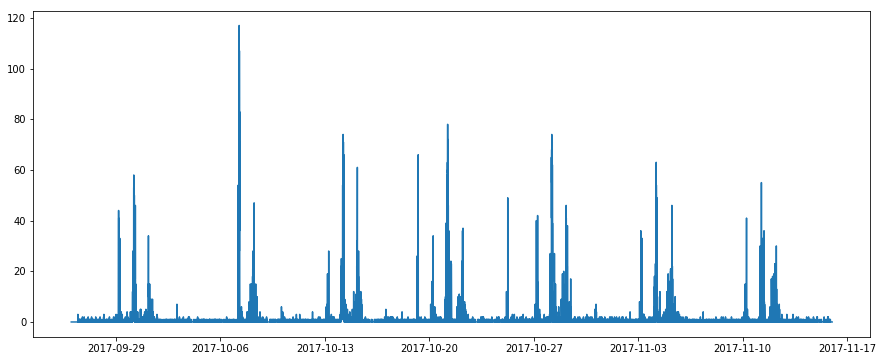

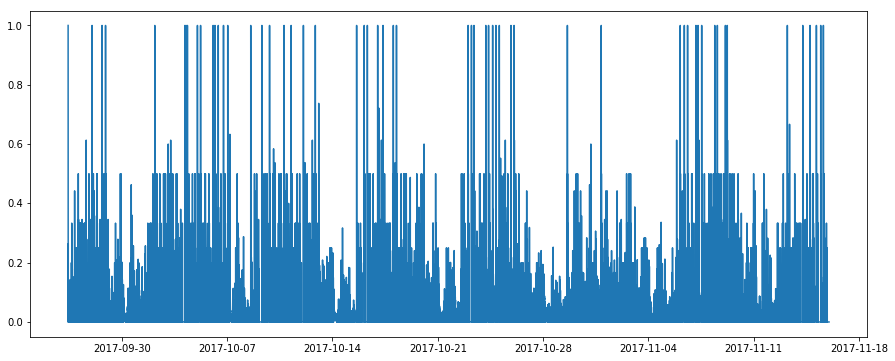

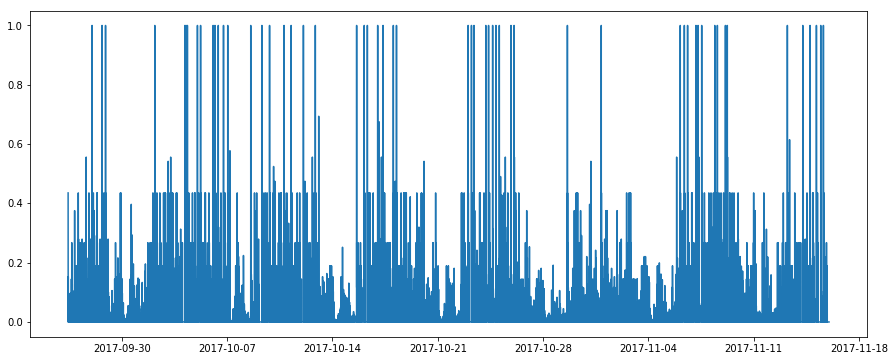

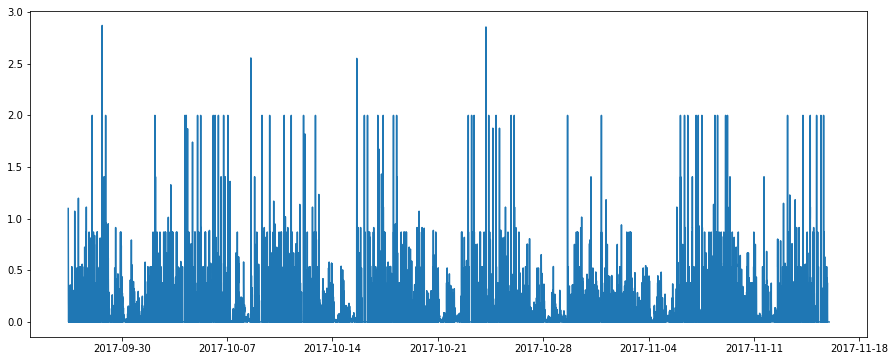

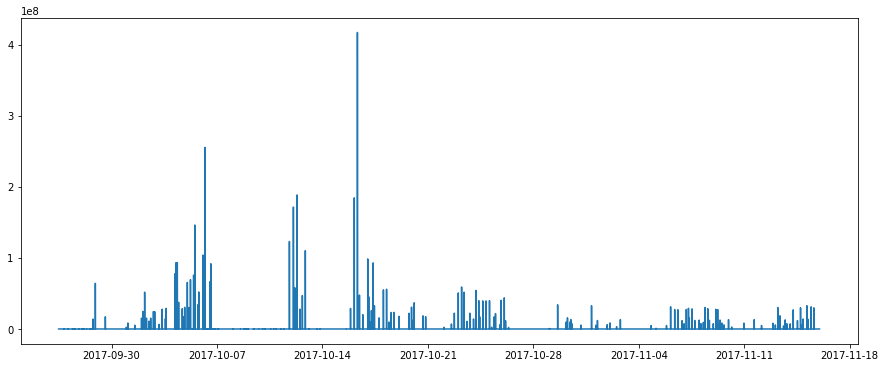

In [129]:
import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

min = 2

def baseline_normalize(df):
    r = int(120/min)
    return df / df.rolling(r).sum()
    

#Emphasize large spikes
def emphasize(df):
    #rolling 2
    alpha = 1.2
    em = lambda x: ( np.abs(x[0] - x[1])**alpha )
    df1 = df.rolling(2).apply(em)
    return df1


def smooth(df):
    #r = int(120/min)
    r = 5
    return df.rolling(r).sum()

#zscore not useful
def detect_trend(df):
    r = int(60/min)
    return ( df - df.shift().rolling(r).mean()) / df.shift().rolling(r).std()
    

def main2(d):
    ht_name = d[0]
    timestamp_list = [ datetime.strptime(x, "%Y%m%d-%H%M%S") for x in d[1] ]
    freq = str(min) + 'min'
    rng = pd.date_range('26/09/2017', periods=51*24*60/min, freq=freq)
    df = pd.DataFrame(index=rng)
    kw = {ht_name:pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng)}
    df = df.assign(**kw)
    
    i = 0
    for ts in timestamp_list:
        #print(ts)
        while rng[i] < ts:
            i += 1
        i -= 1
        df.at[rng[i],ht_name] += 1
        '''for i in range(0,len(rng)-1):
            if ts >= rng[i] and ts < rng[i+1]:
                df.at[rng[i],ht_name] += 1
                break'''
        
        '''while not ( ts >= rng[i] and ts < rng[i+1] ):
            if i >= len(rng) - 1:
                break
            i += 1
        if i >= len(rng) - 1:
            break
        i = len(rng) - 1
        while ts < rng[i]:
            i -= 1
        df.at[rng[i],ht_name] += 1'''
    
    df1 = baseline_normalize(np.log(df+1))
    
    df2 = emphasize(df1)
    df3 = smooth(df2)
    df4 = detect_trend(df3)
    
    pre = 0
    plt.figure(0)
    plt.plot(df)
    
    plt.figure(1)   
    plt.plot(df1[pre:])
    
    plt.figure(2)
    plt.plot(df2[pre:])
    
    plt.figure(3)
    plt.plot(df3[pre:])
    
    plt.figure(4)
    plt.plot(df4[pre:])
    
    

                   
def main():
    with open('hts_ts_list') as f:
        i = 0
        for line in f:
            d = json.loads(line)
            if d[0] != 'football':
                continue
            main2(d)
            
    
if __name__ == '__main__':
    main()

In [132]:
import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

min = 2
def main2(d):
    ht_name = d[0]
    timestamp_list = [ datetime.strptime(x, "%Y%m%d-%H%M%S") for x in d[1] ]
    freq = str(min) + 'min'
    rng = pd.date_range('26/09/2017', periods=51*24*60/min, freq=freq)
    df = pd.DataFrame(index=rng)
    kw = {ht_name:pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng)}
    df = df.assign(**kw)
    i = 0
    for ts in timestamp_list:
        while rng[i] < ts:
            i += 1
        i -= 1
        df.at[rng[i],ht_name] += 1
        '''for i in range(0,len(rng)-1):
            if ts >= rng[i] and ts < rng[i+1]:
                df.at[rng[i],ht_name] += 1
                break'''
    
    print('[{},{}]'.format(ht_name,df.max()[ht_name]))
    '''with open('hts_max_count_2hr','a') as f:
        f.write(json.dumps([ht_name,df.max()[ht_name]])+'\n')'''
                   
def main():
    with open('hts_ts_list') as f:
        i = 0
        for line in f:
            i += 1
            d = json.loads(line)
            '''if d[0] != 'giveaway':
                continue'''
            main2(d)
            
    
if __name__ == '__main__':
    main()

[crypto,34]
[Egypt,8]
[momlife,53]
[giveaway,53]
[ad,19]
[EXO,224]
[KoKoBop,10]
[Lit,5]
[CoinDrop,29]
[FOLLOWERS,25]


KeyboardInterrupt: 

In [77]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from scipy import stats


def main():
    count_list = []
    #[1,3,6,12,24]
    hour = 3
    #df = pd.read_csv('count_hts_from_tweets_' + str(hour) + 'h.csv')
    df = pd.read_csv('count_hts_from_tweets_' + str(hour) + 'h.csv',index_col=0, parse_dates=True)
    #print(df.iloc[0] / df.iloc[0:400].sum())
    #print(baseline_normalize(df))
    with open('hts_count_over200_3h_interval_timestamp','a') as f:
        for index, row in df.iterrows():
            break
            '''
            for c in df.columns:
                if row[c] > 200:
                    f.write(json.dumps([c,index.strftime("%Y%m%d-%H%M%S")]) + '\n' )
                    #print('[{},{}]'.format(c,index.strftime("%Y%m%d-%H%M%S")))
            '''
    
if __name__ == '__main__':
    main()

crypto                       0.0
Egypt                        0.0
momlife                      0.0
giveaway                     0.0
ad                           0.0
EXO                          0.0
KoKoBop                      0.0
Lit                          0.0
CoinDrop                     0.0
FOLLOWERS                    0.0
Single                       0.0
looking                      0.0
DatingSite                   0.0
win                          0.0
travice                      0.0
app                          0.0
public                       0.0
city                         0.0
Need                         0.0
TFBJP                        0.0
and                          0.0
the                          0.0
of                           0.0
IU                           0.0
꽃갈피둘                         0.0
football                     0.0
World                        0.0
Consumption                  0.0
Demand                       0.0
Vaccines                     0.0
          

In [6]:
import json
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib.backends.backend_pdf

min = 2
use_pdf = True
debug = False
trend_multiple = 3

def normalize(df):
    #r = int(120/min)
    #df1 = df / df.cumsum()
    #return df1[5:]
    return (df+1) / (df + 1).expanding().mean()

#Emphasize large spikes
def emphasize(df):
    #rolling 2
    alpha = 1.2
    em = lambda x: ( np.abs(x[0] - x[1])**alpha )
    df1 = df.rolling(2).apply(em)
    return df1

def smooth(df):
    # 10 min rolling
    r = 5
    return df.rolling(r).sum()

#zscore not useful
def detect_trend(df):
    return ( (df / df.shift().expanding().mean() ) > trend_multiple ) & (df.shift().expanding().mean() > 2)
    

def main2(d, focus, pdf):
    ht_name = d[0]
    timestamp_list = [ datetime.strptime(x, "%Y%m%d-%H%M%S") for x in d[1] ]
    freq = str(min) + 'min'
    rng = pd.date_range('26/09/2017', periods=51*24*60/min, freq=freq)
    df = pd.DataFrame(index=rng)
    kw = {ht_name:pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng)}
    df = df.assign(**kw)
    
    i = 0
    for ts in timestamp_list:
        while rng[i] < ts:
            i += 1
        i -= 1
        df.at[rng[i],ht_name] += 1
        '''for i in range(0,len(rng)-1):
            if ts >= rng[i] and ts < rng[i+1]:
                df.at[rng[i],ht_name] += 1'''
    
    
    # A4 size
    if use_pdf:
        fig = plt.figure(figsize=(8.27,11.69))
    
    for start_dt in focus[ht_name]:
        df0 = df[start_dt:start_dt+timedelta(minutes=180)]
        df1 = normalize(df0)
        df2 = emphasize(df1)
        df3 = smooth(df2)
        df4 = detect_trend(df3)
        tag_name = ht_name + '_' + start_dt.strftime("%Y%m%d-%H%M%S")
        
        o_list = [ tag_name,
                  df3[ht_name].tolist()[5:] ,
                    [1 if x else 0  for x in df4[ht_name].tolist()[5:]]
                    ]
        o_list.append( 1 if sum(o_list[2])>0 else 0)
        
        if not use_pdf:
            with open('preprocessed/trend_mutiple_'+str(trend_multiple),'a') as outF:
                outF.write(json.dumps(o_list) + '\n')
        
        
        if use_pdf:
            df_l = [df0,df1,df2,df3,df4]
            tag_name = ht_name + '_' + start_dt.strftime("%Y%m%d-%H%M%S") + '_'
            subtitle = [ tag_name + '1.raw',
                         tag_name + '2.normalize_(df+1)/(df+1).expanding().mean()',
                         tag_name + '3.emphasize_1.2',
                         tag_name + '4.smooth_rolling10min',
                            tag_name + '5.detectTrend_(df / df.shift().expanding().mean() ) > 3']
            color = ['blue', 'green', 'grey', 'orange', 'red']
            for i in range(0,5):
                ax1 = fig.add_subplot(5,1,i+1)
                ax1.plot(df_l[i], color=color[i])
                ax1.set_title(subtitle[i])
                fig.tight_layout()
                
        if use_pdf:
            pdf.savefig(fig)
            plt.clf()
        
        if debug:
            return
            
        
        

                   
def main():
    
    pdf = None
    if use_pdf:
        pdf = matplotlib.backends.backend_pdf.PdfPages('output2.pdf') 
    
    focus = {}
    with open('hts_count_over200_3h_interval_timestamp') as f:
        for line in f:
            d = json.loads(line)
            ts = datetime.strptime(d[1], "%Y%m%d-%H%M%S")
            if d[0] in focus:
                focus[d[0]].append(ts)
            else:
                focus[d[0]] = [ts]
                
    with open('hts_ts_list') as f:
        for line in f:
            d = json.loads(line)
            '''if d[0] != 'football':
                continue'''
            if d[0] not in focus:
                continue
            main2(d, focus, pdf)
            if debug:
                break
            
    if use_pdf:
        pdf.close()
            
    
if __name__ == '__main__':
    main()

c:\users\chiusing\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [308]:
import json
trend_multiple = 3
l = []
with open('preprocessed/trend_mutiple_'+str(trend_multiple)) as f:
    for line in f:
        d = json.loads(line)
        l.append(d[3])
        print(len(d[2]))
        break
print(l)
print('trend_multiple: {}, #trend: {}, #nonTrend: {}'.format(trend_multiple,sum(l),len(l)-sum(l)))

86
[1]
trend_multiple: 3, #trend: 1, #nonTrend: 0


In [156]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from os import listdir
from os.path import isfile, join
    
min = 2

def main():
    mypath = 'data/tweets/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    freq = str(min) + 'min'
    rng = pd.date_range('26/09/2017', periods=51*24*60/min, freq=freq)
    df = pd.DataFrame(index=rng)
    kw = {'tweet_count':pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng)}
    df = df.assign(**kw)
    i = 0
    for fpath in onlyfiles:
        print(fpath)
        with open(mypath+fpath) as f:
            for line in f:
                tweet = json.loads(line)
                tweet_time = datetime.strptime(tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
                ts = tweet_time                
                while rng[i] < ts:
                    while rng[i] > ts:
                        i -= 1
                    i += 1
                i -= 1
                df.at[rng[i],'tweet_count'] += 1
    df.to_csv('all_tweet_counts_df.csv')
            
    
if __name__ == '__main__':
    main()

stream_tweets-20170926-182453.txt
stream_tweets-20170926-220410.txt
stream_tweets-20170927-010032.txt
stream_tweets-20170927-035451.txt
stream_tweets-20170927-064955.txt
stream_tweets-20170927-093042.txt
stream_tweets-20170927-122426.txt
stream_tweets-20170927-162546.txt
stream_tweets-20170927-200537.txt
stream_tweets-20170927-224442.txt
stream_tweets-20170928-011444.txt
stream_tweets-20170928-035012.txt
stream_tweets-20170928-063526.txt
stream_tweets-20170928-092151.txt
stream_tweets-20170928-120047.txt
stream_tweets-20170928-145527.txt
stream_tweets-20170928-181808.txt
stream_tweets-20170928-204016.txt
stream_tweets-20170928-231333.txt
stream_tweets-20170929-014756.txt
stream_tweets-20170929-043303.txt
stream_tweets-20170929-070622.txt
stream_tweets-20170929-092609.txt
stream_tweets-20170929-111029.txt
stream_tweets-20170929-130852.txt
stream_tweets-20170929-151044.txt
stream_tweets-20170929-174612.txt
stream_tweets-20170929-203402.txt
stream_tweets-20170929-224219.txt
stream_tweets-

stream_tweets-20171020-121454.txt
stream_tweets-20171020-140643.txt
stream_tweets-20171020-165329.txt
stream_tweets-20171020-195312.txt
stream_tweets-20171020-221200.txt
stream_tweets-20171021-000118.txt
stream_tweets-20171021-021656.txt
stream_tweets-20171021-043701.txt
stream_tweets-20171021-063733.txt
stream_tweets-20171021-085957.txt
stream_tweets-20171021-112433.txt
stream_tweets-20171021-130957.txt
stream_tweets-20171021-145756.txt
stream_tweets-20171021-173243.txt
stream_tweets-20171021-193939.txt
stream_tweets-20171021-214107.txt
stream_tweets-20171021-234637.txt
stream_tweets-20171022-012054.txt
stream_tweets-20171022-031820.txt
stream_tweets-20171022-054136.txt
stream_tweets-20171022-074836.txt
stream_tweets-20171022-100640.txt
stream_tweets-20171022-124029.txt
stream_tweets-20171022-150538.txt
stream_tweets-20171022-174008.txt
stream_tweets-20171022-192250.txt
stream_tweets-20171022-214548.txt
stream_tweets-20171022-233611.txt
stream_tweets-20171023-013012.txt
stream_tweets-

stream_tweets-20171114-134801.txt
stream_tweets-20171114-175857.txt
stream_tweets-20171114-210548.txt
stream_tweets-20171115-000144.txt
stream_tweets-20171115-031808.txt
stream_tweets-20171115-065923.txt
stream_tweets-20171115-104700.txt
stream_tweets-20171115-142803.txt
stream_tweets-20171115-185831.txt
stream_tweets-20171115-222356.txt
stream_tweets-20171116-012802.txt


36630


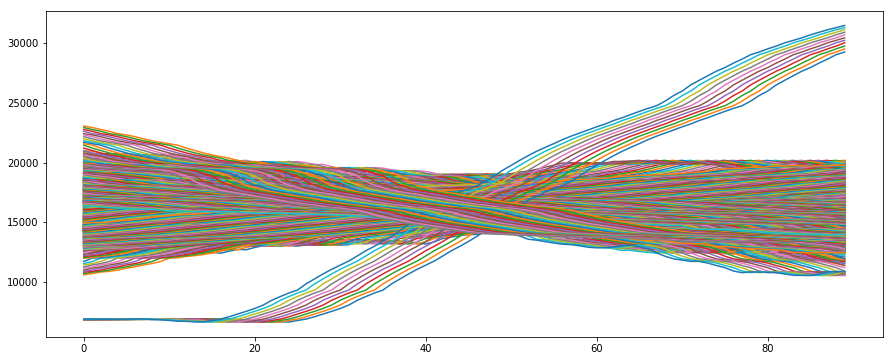

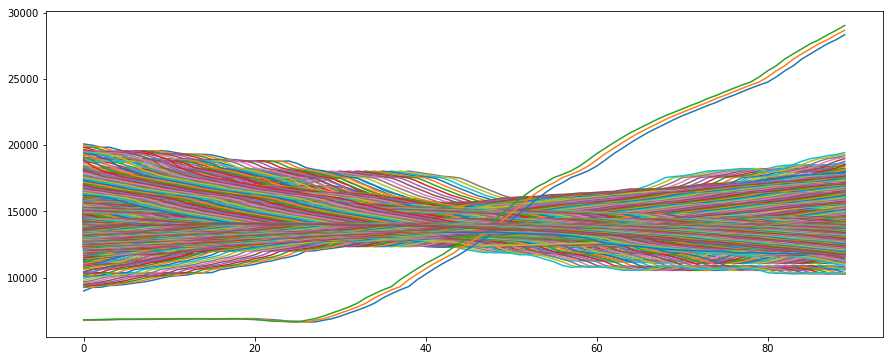

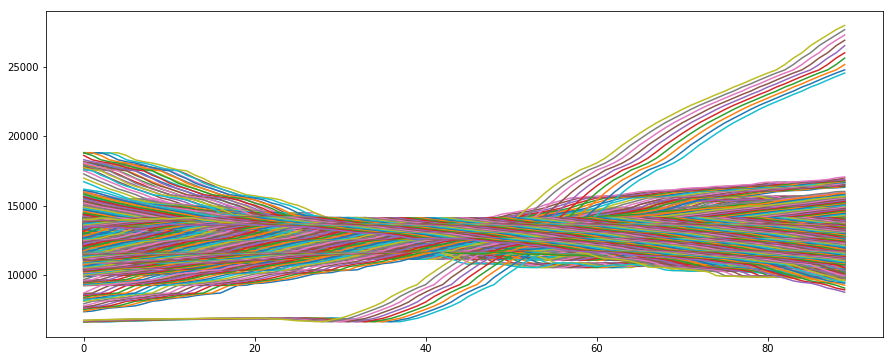

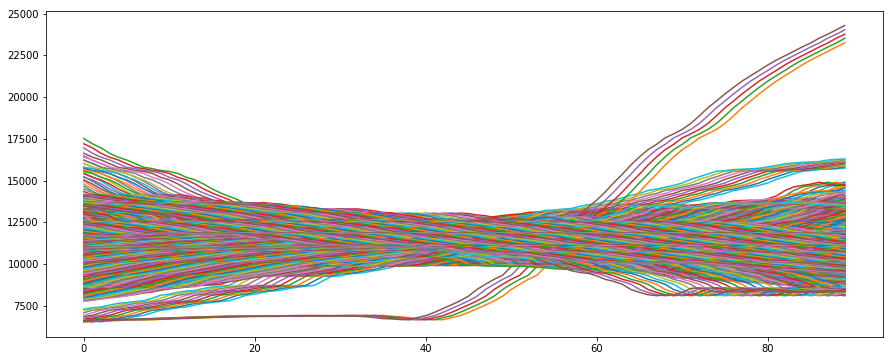

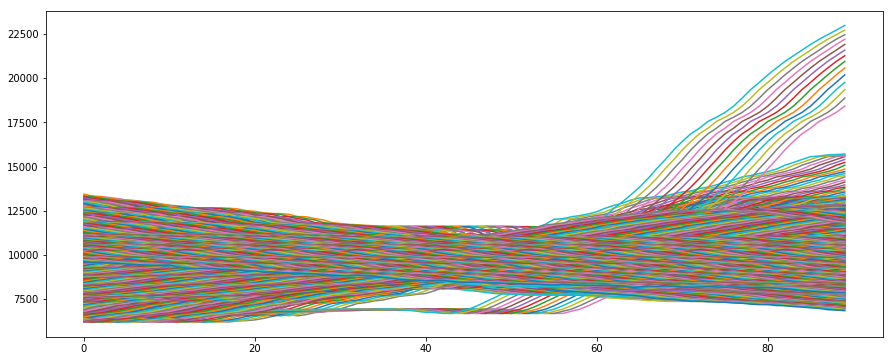

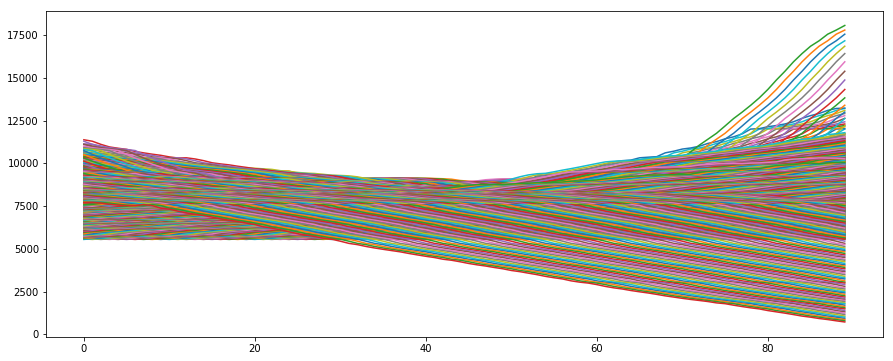

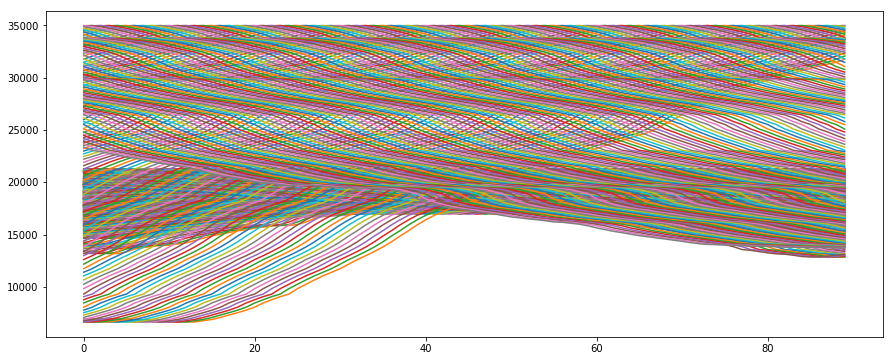

In [196]:
import json
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib.backends.backend_pdf
from sklearn.cluster import KMeans

def main():
    df = pd.read_csv('all_tweet_counts_df.csv',index_col=0, parse_dates=True)
    data = df.rolling(90).sum()['tweet_count'].fillna(0).tolist()
    x = []
    for i in range(0,len(data)-90):
        x.append(data[i:i+90])
    print(len(x))
    #plt.plot(x[1000])
    #return
    kmeans = KMeans().fit(x[:15000])
    for i,v in enumerate(kmeans.predict(x[15000:])):
        i += 15000
        plt.figure(v)
        plt.plot(x[i])

    #plt.plot(df.rolling(30).sum())
    #df1 = df.resample('D').sum().fillna(0)
    #plt.plot(df1)

if __name__ == '__main__':
    main()

In [211]:
from os import listdir
from os.path import isfile, join
import math
import json
from textblob import TextBlob as tb

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return round(tf(word, blob) * idf(word, bloblist),3)

def main():
    mypath = 'tweets_filtered_top1000/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    hts_needed = {}
    hts = {}
    with open('count_all_hts') as f:
        count = 0
        for l in f:
            count += 1
            if count > 1000:
                break
            d = json.loads(l)
            hts_needed[d[0]] = d[1]
    for fpath in onlyfiles:
        print(fpath)
        with open(mypath+fpath) as f:
            for line in f:
                tweet = json.loads(line)
                for ht in tweet['hashtags']:
                    ht_name = ht['text'].lower()
                    if ht_name not in hts_needed:
                        continue
                    if ht_name not in hts:
                        hts[ht_name] = {}
                        hts[ht_name]['retweeted_status_id_str'] = []
                        hts[ht_name]['aggregated_text'] = ''
                    if tweet['retweeted_status_id_str'] not in hts[ht_name]['retweeted_status_id_str']:
                        hts[ht_name]['aggregated_text'] += tweet['text'] + ' '
                        hts[ht_name]['retweeted_status_id_str'].append(tweet['retweeted_status_id_str'])
    bloblist = []
    ht_names = []
    for k,v in hts.items():
        bloblist.append( tb(v['aggregated_text'].lower()))
        ht_names.append(k)
    print(len(hts_needed))
    print(len(ht_names))
    print(hts_needed)
    print(ht_names)
    with open('top1000_hts_tfidf','a') as output:
        for i, blob in enumerate(bloblist):
            print("progress: {}/{}".format(i,len(bloblist)))
            scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
            sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
            ht = {}
            ht['ht_name'] = ht_names[i]
            ht['sorted_tfidf_words'] = sorted_words
            output.write(json.dumps(ht) + "\n")
            
if __name__ == '__main__':
    main()

stream_tweets-20170926-182453.txt
stream_tweets-20170926-220410.txt
stream_tweets-20170927-010032.txt
stream_tweets-20170927-035451.txt
stream_tweets-20170927-064955.txt
stream_tweets-20170927-093042.txt
stream_tweets-20170927-122426.txt
stream_tweets-20170927-162546.txt
stream_tweets-20170927-200537.txt
stream_tweets-20170927-224442.txt
stream_tweets-20170928-011444.txt
stream_tweets-20170928-035012.txt
stream_tweets-20170928-063526.txt
stream_tweets-20170928-092151.txt
stream_tweets-20170928-120047.txt
stream_tweets-20170928-145527.txt
stream_tweets-20170928-181808.txt
stream_tweets-20170928-204016.txt
stream_tweets-20170928-231333.txt
stream_tweets-20170929-014756.txt
stream_tweets-20170929-043303.txt
stream_tweets-20170929-070622.txt
stream_tweets-20170929-092609.txt
stream_tweets-20170929-111029.txt
stream_tweets-20170929-130852.txt
stream_tweets-20170929-151044.txt
stream_tweets-20170929-174612.txt
stream_tweets-20170929-203402.txt
stream_tweets-20170929-224219.txt
stream_tweets-

stream_tweets-20171020-121454.txt
stream_tweets-20171020-140643.txt
stream_tweets-20171020-165329.txt
stream_tweets-20171020-195312.txt
stream_tweets-20171020-221200.txt
stream_tweets-20171021-000118.txt
stream_tweets-20171021-021656.txt
stream_tweets-20171021-043701.txt
stream_tweets-20171021-063733.txt
stream_tweets-20171021-085957.txt
stream_tweets-20171021-112433.txt
stream_tweets-20171021-130957.txt
stream_tweets-20171021-145756.txt
stream_tweets-20171021-173243.txt
stream_tweets-20171021-193939.txt
stream_tweets-20171021-214107.txt
stream_tweets-20171021-234637.txt
stream_tweets-20171022-012054.txt
stream_tweets-20171022-031820.txt
stream_tweets-20171022-054136.txt
stream_tweets-20171022-074836.txt
stream_tweets-20171022-100640.txt
stream_tweets-20171022-124029.txt
stream_tweets-20171022-150538.txt
stream_tweets-20171022-174008.txt
stream_tweets-20171022-192250.txt
stream_tweets-20171022-214548.txt
stream_tweets-20171022-233611.txt
stream_tweets-20171023-013012.txt
stream_tweets-

stream_tweets-20171114-134801.txt
stream_tweets-20171114-175857.txt
stream_tweets-20171114-210548.txt
stream_tweets-20171115-000144.txt
stream_tweets-20171115-031808.txt
stream_tweets-20171115-065923.txt
stream_tweets-20171115-104700.txt
stream_tweets-20171115-142803.txt
stream_tweets-20171115-185831.txt
stream_tweets-20171115-222356.txt
stream_tweets-20171116-012802.txt
1000
562
{'GOT7': 41767, 'YouAre': 41026, 'giveaway': 37042, 'football': 32048, 'ad': 18507, 'EXO': 13421, 'Single': 13274, 'looking': 13155, 'DatingSite': 13109, 'win': 12820, 'ThankyouKDiamonds': 12444, 'momlife': 12289, 'travice': 11589, 'app': 11578, 'ComprehensiveCapricorn': 11178, 'love': 10792, 'Techhouse': 10429, 'Deephouse': 10379, 'Techno': 10357, 'marketing': 9826, 'news': 9583, 'travel': 9376, 'App': 8508, 'AestheticBwiiMINIGA': 8388, 'Music': 8217, 'Instgramfollowers': 8115, 'CoinDrop': 8034, 'halloween': 7967, 'iOS': 7965, 'AI': 7615, 'BLESSED': 7396, '불타오르네': 7114, 'Jesus': 6887, 'TrapaDrive': 6387, 'Tor

progress: 1/562
progress: 2/562
progress: 3/562
progress: 4/562
progress: 5/562
progress: 6/562
progress: 7/562
progress: 8/562
progress: 9/562
progress: 10/562
progress: 11/562
progress: 12/562
progress: 13/562
progress: 14/562
progress: 15/562
progress: 16/562
progress: 17/562
progress: 18/562
progress: 19/562
progress: 20/562
progress: 21/562
progress: 22/562
progress: 23/562
progress: 24/562
progress: 25/562
progress: 26/562
progress: 27/562
progress: 28/562
progress: 29/562
progress: 30/562
progress: 31/562
progress: 32/562
progress: 33/562
progress: 34/562
progress: 35/562
progress: 36/562
progress: 37/562
progress: 38/562
progress: 39/562
progress: 40/562
progress: 41/562
progress: 42/562
progress: 43/562
progress: 44/562
progress: 45/562
progress: 46/562
progress: 47/562
progress: 48/562
progress: 49/562
progress: 50/562
progress: 51/562
progress: 52/562
progress: 53/562
progress: 54/562
progress: 55/562
progress: 56/562
progress: 57/562
progress: 58/562
progress: 59/562
progre

progress: 463/562
progress: 464/562
progress: 465/562
progress: 466/562
progress: 467/562
progress: 468/562
progress: 469/562
progress: 470/562
progress: 471/562
progress: 472/562
progress: 473/562
progress: 474/562
progress: 475/562
progress: 476/562
progress: 477/562
progress: 478/562
progress: 479/562
progress: 480/562
progress: 481/562
progress: 482/562
progress: 483/562
progress: 484/562
progress: 485/562
progress: 486/562
progress: 487/562
progress: 488/562
progress: 489/562
progress: 490/562
progress: 491/562
progress: 492/562
progress: 493/562
progress: 494/562
progress: 495/562
progress: 496/562
progress: 497/562
progress: 498/562
progress: 499/562
progress: 500/562
progress: 501/562
progress: 502/562
progress: 503/562
progress: 504/562
progress: 505/562
progress: 506/562
progress: 507/562
progress: 508/562
progress: 509/562
progress: 510/562
progress: 511/562
progress: 512/562
progress: 513/562
progress: 514/562
progress: 515/562
progress: 516/562
progress: 517/562
progress: 

In [220]:
from os import listdir
from os.path import isfile, join
import math
import json

min_numOfMatches = 6
max_numOfMatches = 10
min_matchingSet = 10
max_matchingSet = 10

def main2(groups_list):
    mypath = 'tweets_filtered_top1000/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    cooccurance_score = 0
    for fpath in onlyfiles:
        print(fpath)
        with open( mypath+fpath) as f:
            for line in f:
                tweet = json.loads(line)
                ht_list = [ x['text'].lower() for x in tweet['hashtags']]
                for gps_i, groups in enumerate(groups_list):
                    for gp in groups['groups']:
                        counter = len(set(gp['topics'])&set(ht_list))
                        if counter > 1:
                            groups_list[gps_i]['cooccurance_score'] += counter
    with open('tfidf_groups_analysis_result.txt','a') as f:
        for groups in groups_list:
            numOfMatches = groups['numOfMatches']
            matchingSet = groups['matchingSet']
            cooccurance_score = groups['cooccurance_score']
            f.write('cooccurance_score for {}/{} grouping: {}'.format(numOfMatches,matchingSet,cooccurance_score) + '\n')
    
def main():
    hts = {}
    groups_list = []
    with open('top1000_hts_tfidf') as f:
        for line in f:
            d = json.loads(line)
            ht_name = d['ht_name']
            sorted_tfidf_words = [ x[0] for x in d['sorted_tfidf_words'] ]
            hts[ht_name] = sorted_tfidf_words
    for matchingSet in range(min_matchingSet,max_matchingSet+1):
        for numOfMatches in range(min_numOfMatches, max_numOfMatches+1):
            print('processing {}/{}'.format(numOfMatches,matchingSet))
            groups = []
            for k,v in hts.items():
                v = v[:matchingSet]
                found = False
                for gp in groups:
                    counter = len(set(gp['sorted_tfidf_words'])&set(v))
                    if counter >= numOfMatches:
                        found = True
                        if k not in gp['topics']:
                            gp['topics'].append(k)
                if not found:
                    d = {}
                    d['sorted_tfidf_words'] = v
                    d['topics'] = [k]
                    groups.append(d)
            gps = { 'numOfMatches':numOfMatches,
                       'matchingSet':matchingSet,
                       'groups':groups,
                       'cooccurance_score':0
                  }
            groups_list.append(gps)
            #continue
            with open('tfidf_groups/tfidf_groups_'+str(numOfMatches)+'_'+str(matchingSet),'a') as outF:
                for gp in groups:
                    outF.write(json.dumps(gp)+'\n')
    #main2(groups_list)
            
if __name__ == '__main__':
    main()

processing 6/10
processing 7/10
processing 8/10
processing 9/10
processing 10/10


In [ ]:
from os import listdir
from os.path import isfile, join
import math
import json


def main():
    mypath = 'tweets_filtered_top1000/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    hts_needed = {}
    hts = {}
    with open('count_all_hts') as f:
        count = 0
        for l in f:
            count += 1
            if count > 1000:
                break
            d = json.loads(l)
            hts_needed[d[0]] = d[1]
    for fpath in onlyfiles:
        print(fpath)
        with open(mypath+fpath) as f:
            for line in f:
                tweet = json.loads(line)
            
if __name__ == '__main__':
    main()

In [9]:
from os import listdir
from os.path import isfile, join
import math
import json


def main():
    mypath = 'data/tweets/'
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    hts = {}
    for fpath in onlyfiles:
        print(fpath)
        with open(mypath+fpath) as f:
            for line in f:
                tweet = json.loads(line)
                for ht in tweet['hashtags']:
                    ht_name = ht['text'].lower()
                    if ht_name in hts:
                        hts[ht_name] += 1
                    else:
                        hts[ht_name] = 1
    hts = sorted(hts.items(), key=lambda x: x[1], reverse=True)
    with open('count_all_hts_new','a') as f:
        for x in hts:
            f.write( json.dumps(x) + '\n')
                
            
if __name__ == '__main__':
    main()

stream_tweets-20170926-182453.txt
stream_tweets-20170926-220410.txt
stream_tweets-20170927-010032.txt
stream_tweets-20170927-035451.txt
stream_tweets-20170927-064955.txt
stream_tweets-20170927-093042.txt
stream_tweets-20170927-122426.txt
stream_tweets-20170927-162546.txt
stream_tweets-20170927-200537.txt
stream_tweets-20170927-224442.txt
stream_tweets-20170928-011444.txt
stream_tweets-20170928-035012.txt
stream_tweets-20170928-063526.txt
stream_tweets-20170928-092151.txt
stream_tweets-20170928-120047.txt
stream_tweets-20170928-145527.txt
stream_tweets-20170928-181808.txt
stream_tweets-20170928-204016.txt
stream_tweets-20170928-231333.txt
stream_tweets-20170929-014756.txt
stream_tweets-20170929-043303.txt
stream_tweets-20170929-070622.txt
stream_tweets-20170929-092609.txt
stream_tweets-20170929-111029.txt
stream_tweets-20170929-130852.txt
stream_tweets-20170929-151044.txt
stream_tweets-20170929-174612.txt
stream_tweets-20170929-203402.txt
stream_tweets-20170929-224219.txt
stream_tweets-

stream_tweets-20171020-121454.txt
stream_tweets-20171020-140643.txt
stream_tweets-20171020-165329.txt
stream_tweets-20171020-195312.txt
stream_tweets-20171020-221200.txt
stream_tweets-20171021-000118.txt
stream_tweets-20171021-021656.txt
stream_tweets-20171021-043701.txt
stream_tweets-20171021-063733.txt
stream_tweets-20171021-085957.txt
stream_tweets-20171021-112433.txt
stream_tweets-20171021-130957.txt
stream_tweets-20171021-145756.txt
stream_tweets-20171021-173243.txt
stream_tweets-20171021-193939.txt
stream_tweets-20171021-214107.txt
stream_tweets-20171021-234637.txt
stream_tweets-20171022-012054.txt
stream_tweets-20171022-031820.txt
stream_tweets-20171022-054136.txt
stream_tweets-20171022-074836.txt
stream_tweets-20171022-100640.txt
stream_tweets-20171022-124029.txt
stream_tweets-20171022-150538.txt
stream_tweets-20171022-174008.txt
stream_tweets-20171022-192250.txt
stream_tweets-20171022-214548.txt
stream_tweets-20171022-233611.txt
stream_tweets-20171023-013012.txt
stream_tweets-

stream_tweets-20171114-134801.txt
stream_tweets-20171114-175857.txt
stream_tweets-20171114-210548.txt
stream_tweets-20171115-000144.txt
stream_tweets-20171115-031808.txt
stream_tweets-20171115-065923.txt
stream_tweets-20171115-104700.txt
stream_tweets-20171115-142803.txt
stream_tweets-20171115-185831.txt
stream_tweets-20171115-222356.txt
stream_tweets-20171116-012802.txt
stream_tweets-20171202-152144.txt
stream_tweets-20171202-183446.txt
stream_tweets-20171202-210519.txt
stream_tweets-20171202-232916.txt
stream_tweets-20171203-020018.txt
stream_tweets-20171203-042712.txt
stream_tweets-20171203-064604.txt
stream_tweets-20171203-091922.txt
stream_tweets-20171203-115144.txt
stream_tweets-20171203-144238.txt
stream_tweets-20171203-175345.txt
stream_tweets-20171203-210249.txt
stream_tweets-20171203-234046.txt
stream_tweets-20171204-015258.txt
stream_tweets-20171204-035042.txt
stream_tweets-20171204-054910.txt
stream_tweets-20171204-082356.txt
stream_tweets-20171204-105759.txt
stream_tweets-

stream_tweets-20180103-062126.txt
stream_tweets-20180103-102906.txt
stream_tweets-20180103-145435.txt
stream_tweets-20180103-200838.txt
stream_tweets-20180103-235620.txt
stream_tweets-20180104-034619.txt
stream_tweets-20180104-074124.txt
stream_tweets-20180104-125658.txt
stream_tweets-20180104-174714.txt
stream_tweets-20180104-220239.txt
stream_tweets-20180105-011957.txt
stream_tweets-20180105-041802.txt
stream_tweets-20180105-080034.txt
stream_tweets-20180105-121750.txt
stream_tweets-20180105-171814.txt
stream_tweets-20180105-213114.txt
stream_tweets-20180105-235645.txt
stream_tweets-20180106-022918.txt
stream_tweets-20180106-055027.txt
stream_tweets-20180106-093313.txt
stream_tweets-20180106-130700.txt
stream_tweets-20180106-174242.txt
stream_tweets-20180106-220355.txt
stream_tweets-20180107-014847.txt
stream_tweets-20180107-055230.txt
stream_tweets-20180107-101838.txt
stream_tweets-20180107-190713.txt
stream_tweets-20180107-223607.txt
stream_tweets-20180108-013429.txt
stream_tweets-

stream_tweets-20180206-185612.txt
stream_tweets-20180206-224624.txt
stream_tweets-20180207-012124.txt
stream_tweets-20180207-043435.txt
stream_tweets-20180207-083519.txt
stream_tweets-20180207-124925.txt
stream_tweets-20180207-181843.txt
stream_tweets-20180207-213348.txt
stream_tweets-20180208-004258.txt
stream_tweets-20180208-042446.txt
stream_tweets-20180208-080212.txt
stream_tweets-20180208-112505.txt
stream_tweets-20180208-160720.txt
stream_tweets-20180208-204621.txt
stream_tweets-20180208-231035.txt
stream_tweets-20180209-022459.txt
stream_tweets-20180209-062021.txt
stream_tweets-20180209-095859.txt
stream_tweets-20180209-143859.txt
stream_tweets-20180209-200243.txt
stream_tweets-20180209-234832.txt
stream_tweets-20180210-035302.txt
stream_tweets-20180210-075849.txt
stream_tweets-20180210-115906.txt
stream_tweets-20180210-170811.txt
stream_tweets-20180210-215029.txt
stream_tweets-20180211-011950.txt
stream_tweets-20180211-050730.txt
stream_tweets-20180211-090014.txt
stream_tweets-

In [1]:
import json
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import matplotlib.backends.backend_pdf

min = 2
use_pdf = True
debug = False
trend_multiple = 3

def normalize(df):
    # 180/2 = 90
    return (df+1) / (df + 1).rolling(90).mean()

#Emphasize large spikes
def emphasize(df):
    #rolling 2
    alpha = 1.2
    em = lambda x: ( np.abs(x[0] - x[1])**alpha )
    df1 = df.rolling(2).apply(em)
    return df1

def smooth(df):
    # 10 min rolling
    r = 5
    return df.rolling(r).sum()

def detect_valid_trend(df, df_raw):
    threshold = 2
    df1 =  ( (df / df.shift().rolling(90).mean() ) > trend_multiple )*1
    no_consec = lambda x: ( 0 if sum(x) > 1 else sum(x))
    df_trend = df1
    #df_trend = df1.rolling(90).apply(no_consec)
    df_valid = ( (df_raw.shift().rolling(90).sum() > 200) & (df_raw.shift().rolling(90).mean() > threshold)  )*1
    df_trend = df_trend * df_valid
    return df_valid, df_trend
    
    
    

def main2(d, pdf):
    ht_name = '#' + d[0]
    print(ht_name)
    timestamp_list = [ datetime.strptime(x, "%Y%m%d-%H%M%S") for x in d[1] ]
    freq = str(min) + 'min'
    # 148 days, from/includinig sep25, to/not including feb 20
    rng = pd.date_range('25/09/2017', periods=148*24*60/min, freq=freq)
    df = pd.DataFrame(index=rng)
    kw = {ht_name:pd.Series(np.zeros(len(rng)),dtype=np.int, index=rng)}
    df = df.assign(**kw)
    
    i = 0
    for ts in timestamp_list:
        while rng[i] < ts:
            i += 1
        i -= 1
        df.at[rng[i],ht_name] += 1
        '''for i in range(0,len(rng)-1):
            if ts >= rng[i] and ts < rng[i+1]:
                df.at[rng[i],ht_name] += 1'''
    
    
    # A4 size
    fig = None
    if use_pdf:
        fig = plt.figure(figsize=(8.27,11.69))
    
    df0 = df
    df1 = normalize(df0)
    df2 = emphasize(df1)
    df3 = smooth(df2)
    df_valid, df_trend = detect_valid_trend(df3, df0)
    df_nonTrend = df_valid
    tag_name = ht_name
    
    num_output = 0
    for i in range(90, len(rng)-90):
        # trend first
        #if sum(df_valid[ht_name].tolist()[i-90:i-1]) == 0 and df_valid.at[rng[i],ht_name]:
        if df_valid.at[rng[i],ht_name]:
            isTrend = 0 
            if df_trend.at[rng[i],ht_name] == 1 and sum(df_trend[ht_name].tolist()[i-90:i-1]) == 0:
                isTrend = 1
                for j in range(i+1,i+90):
                    df_trend.at[rng[j],ht_name] = 0
                    df_valid.at[rng[j],ht_name] = 0
            elif df_nonTrend.at[rng[i],ht_name] == 1 and sum(df_nonTrend[ht_name].tolist()[i-90:i-1]) == 0:
                isTrend = 0
                for j in range(i+1,i+90):
                    df_nonTrend.at[rng[j],ht_name] = 0
                    df_valid.at[rng[j],ht_name] = 0
            else:
                continue
                
            num_output += 1
                
            #df0 = df[start_dt:start_dt+timedelta(minutes=180)]
            df_raw = df0[rng[i-90]:rng[i]]
            df_nor = df1[rng[i-90]:rng[i]]
            df_em = df2[rng[i-90]:rng[i]]
            df_s = df3[rng[i-90]:rng[i]]
            
            o_list = {
                        'ht_name':ht_name,
                        'isTrend':isTrend,
                        'df_smoothed':df_s[ht_name].tolist() ,
            }

            with open('preprocessed_trend_mutiple_'+str(trend_multiple),'a') as outF:
                outF.write(json.dumps(o_list) + '\n')


            if use_pdf:
                df_l = [df_raw,df_nor,df_em,df_s]
                subtitle = [ tag_name + '_1.raw',
                             tag_name + '_2.normalize',
                             tag_name + '_3.emphasize_1.2',
                             tag_name + '_4.smooth_isTrend_' + str(isTrend)
                           ]
                color = ['blue', 'green', 'grey', 'orange']
                for i in range(0,4):
                    ax1 = fig.add_subplot(4,1,i+1)
                    ax1.plot(df_l[i], color=color[i])
                    ax1.set_title(subtitle[i])
                    fig.tight_layout()

            if use_pdf:
                pdf.savefig(fig)
                plt.clf()

    
    return num_output

        
        

                   
def main():
    
    pdf = None
    if use_pdf:
        pdf = matplotlib.backends.backend_pdf.PdfPages('output.pdf') 
                
    with open('hts_ts_list_new') as f:
        for line in f:
            d = json.loads(line)
            '''if d[0] != 'football':
                continue'''
            num_output = main2(d, pdf)
            if num_output == 0:
                continue
            if debug:
                break
            
    if use_pdf:
        pdf.close()
            
    
if __name__ == '__main__':
    main()

#crypto
#egypt
#momlife
#giveaway
#classic
#ad
#exo
#kokobop
#lit
#coindrop
#followers
#single
#looking
#datingsite
#win
#travice
#app
#city
#need
#tfbjp
#and


c:\users\chiusing\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


#the
#band
#of
#iu
#꽃갈피둘
#soundcloud
#football
#world
#consumption
#demand
#great
#instgramfollowers
#ps4share
#yorkshire
#slimming
#waisttrainer
#bodyshaper
#transformation
#marketing
#success
#podover
#quote
#academicjobs
#academic
#jobs
#needfriend
#friends
#new
#lover
#techhouse
#deephouse
#techno
#news
#eu
#snapchat
#atlantis
#hotel
#dubai
#photo
#rohingya
#berlin
#followback
#paris
#technology
#call
#black
#nyc
#growth
#growthhacking
#tech
#digital
#seo
#nsfw
#sexy
#adidas
#boycott
#hot
#newrelease
#free
#amazon
#kindle
#romance
#books
#english
#crime
#booty
#california
#ggmu
#miami
#inspiration
#faith
#delhi
#job
#nude
#sex
#chat
#dating
#love
#double
#head
#blinds
#showroom
#amexmarriott
#not
#music
#education
#sweet
#awesome
#best
#art
#3d
#samsung
#gay
#pennystocks
#construction
#guitar
#hero
#funny
#horny
#bird
#amazing
#jewelry
#theresistance
#event
#penis
#pretty
#mumbai
#film
#course
#kick
#boss
#snow
#xbox
#club
#hit
#stress
#help
#got7
#갓세븐
#7for7
#진영
#college
#drive
#k

#gold
#bracelet
#forher
#갓새븐
#feel
#animal
#weekend
#group
#wtf
#craftbeer
#iartg
#asmsg
#sdlive
#ceo
#metal
#data
#soul
#pet
#tits
#chaturbate
#ccot
#magic
#invest
#blast
#cancer
#ink
#gardening
#nutrition
#alabama
#musicislife
#musicforever
#self
#company
#green
#lead
#sunday
#wow
#superjunior
#pr
#halloween
#europe
#lay
#dong
#anonymous
#manchester
#ice
#fix
#military
#slfeed
#depression
#online
#aria
#housemusic
#vancouver
#homebusiness
#kiss
#actor
#youare
#bambam
#youngjae
#jacksonwang
#jb
#ebony
#strongertogether
#microsoft
#gifts
#fantasy
#hard
#photooftheday
#fl
#hollywood
#vegas
#ny
#cash
#makemoney
#hair
#analytics
#gamer
#have
#box
#elf
#gas
#q94richmond
#eventprofs
#sportstracker
#safety
#street
#smallbusiness
#edge
#luv
#bigolive
#today
#war
#beat
#foodporn
#italy
#aid
#from
#workout
#young
#crochet
#betting
#championsleague
#toys
#download
#erotica
#배진영
#meditation
#clothing
#funnyvideos
#blowjob
#ifollowback
#time
#realmadrid
#mindset
#itunes
#bisexual
#stay
#lego
#amwr

#zootopiaprolifecomic
#aaronzelby
#compareonline
#iamgoodenough
#itsskinthailand
#maheshwari
#iamyou
#speakproject
#triggerbang
#thankyoubts
#우리함께라면_사막도바다가돼
#teambts
#sha256
#wpmoychallenge
#makeandmeetwithgot7
#markjae
#btsxrockineve
#theosxmaswinners
#videomtv2017
#cafe_universe
#rih
#태연
#아미_툽_불타오르네
#merryxmasnhs
#indidigital
#nbavote
#ripjonghyun
#staystrongshawols
#seetweevee
#freejudiciary
#tendermercy
#visagiftcard
#visagiftcode
#culinaryinstituteofamerica
#60broadway
#bp_house
#블핑하우스1화
#비밀스포일러
#사장마음
#themagicofchristmastime
#rvtoday
#할인애교
#첫방송_2018_01_0
#beulpinghouseepisode1
#discountaegyo
#gcr
#got7doll
#abomb
#risingactortaehyung
#weloveshilpashinde
#pistonsallstar
#beenthrough
#sunda
#pkcz
#dukeofsutherland
#princephilip
#4moreyears
#dogwhistle
#removenunes
#backupactor
#partydresses
#wepurpleutaehyung
#iranprotests
#queenz
#astroinusa
#kpopme
#nhc2017
#chicandsexyjbday
#sloppyjoes
#amazingwelcome
#새해건강맨날하자
#복많이숑숑
#2018년도순삭해
#frameable
#spartandawgs
#donghyuk
#lookeddown
#su

MemoryError: In RendererAgg: Out of memory